# **Customer Lifetime Value - Regression** 
By : Intania - JCDS 2302 0005
<hr>

## **1. Introduction** 
One study indicates that the order value from existing customers is 31% higher than that from first-time buyers. It is also a fact that selling to existing customers who are satisfied with our service is much easier than attracting new customers. There's also a general rule of thumb that acquiring new customers costs nearly 5 times more than retaining existing ones.

This is why it's crucial for companies to understand this fundamental concept to build better strategies for existing and potential customers. It may require entirely different strategies and costs that impact the company's profitability.

As a result, over time, a fundamental business metric known as Customer Lifetime Value (CLV) has been developed. This metric helps companies evaluate the potential of their customers and even map out future prospects.

By leveraging CLV, companies can identify the customers who contribute most significantly to their success and tailor strategies to better serve them. Consequently, CLV becomes the cornerstone for formulating and executing customer-specific strategies aimed at maximizing each customer's lifetime profits and extending their duration of association with the company.

### **1.a Customer Lifetime Value**
Customer Lifetime Value is a special tool in a company's toolbox that helps businesses identify their most valuable customers. It estimates the average value a customer brings to the business throughout the course of their relationship. The most basic of CLV formula is as follows:


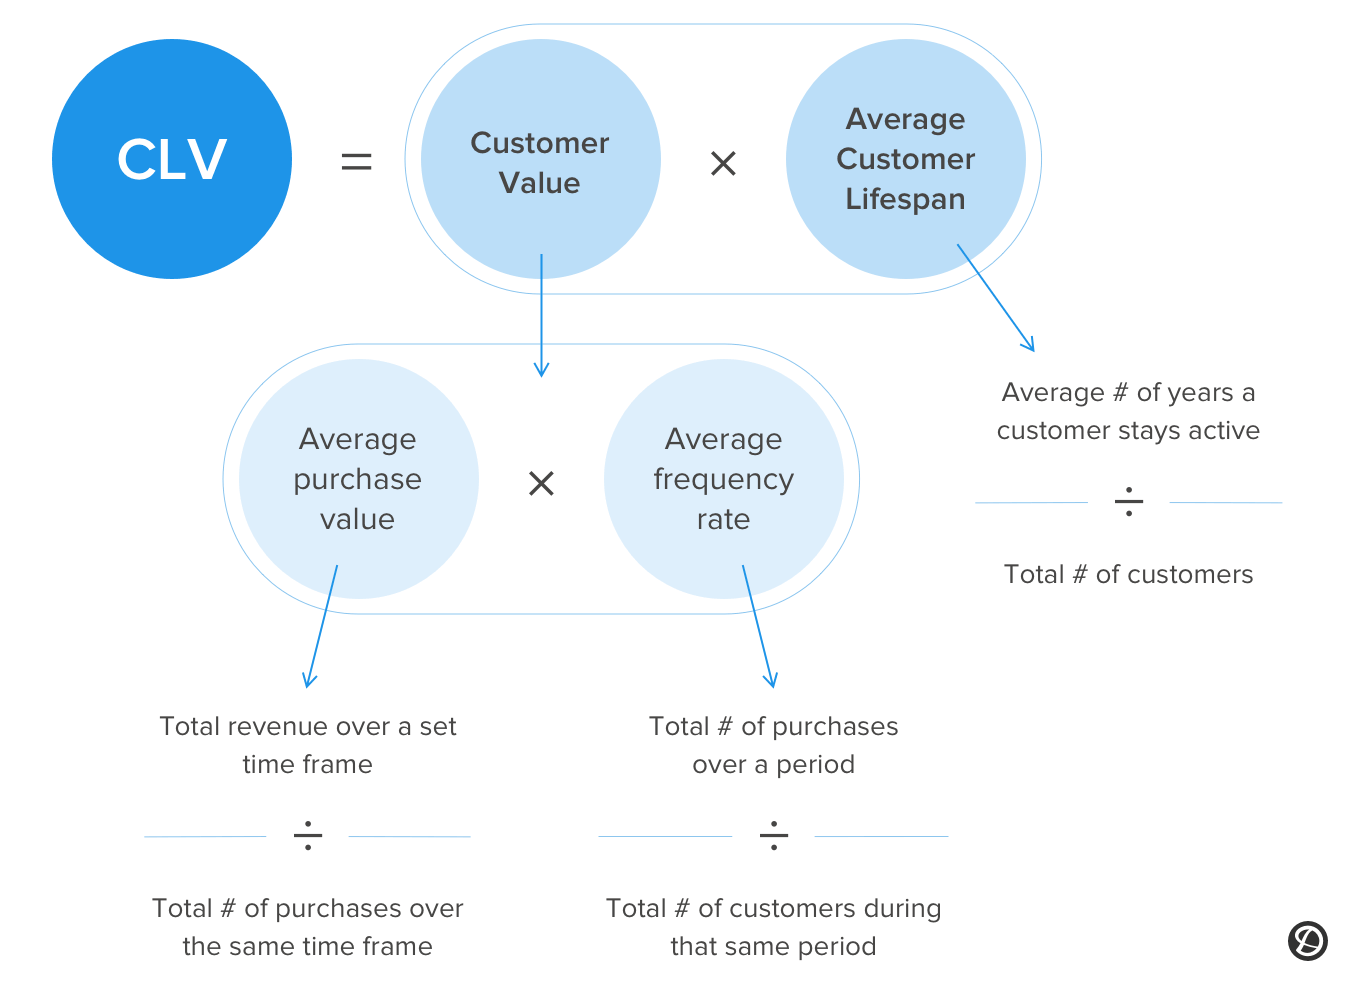

Source of image : www.delighted.com


From this equation, CLV is calculated by counting the total transactions a customer makes over a period of time. The longer the period (or customer lifespan) and the higher the number of transactions, the greater the CLV.

### **1.b Benefit of Customer Lifetime Value** 

CLV isn't just a number. It’s a way to understand which customers contribute the most to a company's success and how to utilise that knowledge to nurture
these valuable customer relationships for long-term profitability and sustainable growth. There are several strategic, CLV-based approaches, which companies can adopt: 

1. **Impacts on Profitability**<br>
     Total consumer value has a direct impact on profitability. Businesses focusing entirely on lead generation and conversions pay the high cost of acquiring these customers. This approach often results in a smaller margin for every sale.<br>

    Understanding your customer lifetime value versus your customer acquisition cost can illuminate how you need to adjust your strategy to bolster margins: optimize your lead generation program, focus on delivering more value to your customers, or both.

2. **Enhanced Customer's Loyalty**<br>
    By knowing that customer has high value it and it's easier to maintain, CLV is a good tool to Cultivating long-term loyalty by optimizing the client experience. One approach is to plan customer loyalty programs with different levels to increase customers' pride and engagement. 

3. **Cross-selling and Up-selling Opportunities**<br>
    Identifying opportune moments to offer customers relevant products, thus increasing sales.<br>

4. **Practice more intelligent acquisition**<br>
    By comparing the value of acquisition and customer spending, a company can gain better insights. This approach prevents the company from allocating excessive budgets indiscriminately and instead focuses on creating strategies that are both effective and budget-friendly.<br>

5. **Better customer segmentation** <br>
    Where CLV can enable company to differentiate the customer and their various qualitative factor that also easir for the company especially marketing company to better understand what they love, they qualities so it can conduct better strategies for acquisition or retaining. 

### **1.c Business Problems** 

Neglecting to strategize around CLV can significantly undermine a company's financial health due to the following potential outcomes:

1. **Loss of Loyal Consumers:** The risk of losing loyal customers due to ineffective strategies can lead to a reduction in revenue over time.
2. **Inefficient Marketing Strategies:** Inability to develop targeted marketing strategies tailored to different customer segments may result in suboptimal cost allocation and diminished profitability. 


### **1.d Goals** <br>

As a data scientist, I was asked by the customer relationship division to create a tool to predict customer lifetime value for the future.

By having this tool, the company will be able to create strategies for retaining customers and ensuring they are satisfied with the company's service.

### **1.e Approach and method** <br>
Utilizing historical data and various features, we will find the best regression model that fits the data and enables the company to predict future CLV also identify the most important features.
<br>

### **1.f Evaluation Method** <br>
The evaluation metrics to be used are RMSE, MAE, and MAPE. RMSE is the root mean square error, MAE is the mean absolute error, and MAPE is the mean absolute percentage error produced by the regression model. The smaller the values of RMSE, MAE, and MAPE, the more accurate the model is in predicting clv based on the features used.

<hr>

In [125]:
# pip install xgboost

In [126]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split & hyperparameter tuning
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV, KFold


# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# ensemble 
from sklearn.ensemble import VotingRegressor, StackingRegressor

# metrics 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


<hr>

## **2. Load Data & Data Understanding**

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | 'Four-Door Car', 'Two-Door Car', 'SUV', 'Sports Car', 'Luxury SUV', 'Luxury Car' |
| Coverage | Object | 'Extended', 'Basic', 'Premium' |
| Renew Offer Type | Object | 'Offer1', 'Offer2', 'Offer3', 'Offer4 |
| Employment Status | Object | 'Retired', 'Employed', 'Disabled', 'Medical Leave', 'Unemployed' |
| Marital Status | Object | 'Divorced', 'Married', 'Single' |
| Education | Object | 'High School or Below', 'College', 'Bachelor', 'Master', 'Doctor' |
| Number of Policies | Float | The number of policies that the customer has |
| Monthly Premium Auto | Float | The premium that the customer pays each month |
| Total Claim Amount | Float | The total amount that the customer has claimed  |
| Income | Float | Customer's Income |
| Customer Lifetime Value | Float | CLV |


In [127]:
# Load dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [128]:
df.shape

(5669, 11)

In [129]:
df.info()

# All the features have the correct dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [130]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [131]:
# Calculate the CLV that above 9031
df[df['Customer Lifetime Value'] > 9032]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
6,Four-Door Car,Premium,Offer2,Employed,Married,High School or Below,2.0,101.0,584.567645,25419.0,12052.984090
9,Four-Door Car,Premium,Offer3,Employed,Divorced,College,3.0,117.0,582.781896,59624.0,9156.322563
11,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,2.0,66.0,227.446260,35624.0,19237.770890
...,...,...,...,...,...,...,...,...,...,...,...
5643,SUV,Extended,Offer1,Unemployed,Single,Bachelor,2.0,127.0,609.600000,0.0,18269.536920
5649,SUV,Basic,Offer3,Employed,Married,High School or Below,8.0,118.0,566.400000,27824.0,9427.684903
5662,Luxury Car,Premium,Offer2,Employed,Married,Doctor,9.0,296.0,498.159874,79655.0,23984.621440
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360


From the table df.describe(), we gather several pieces of information:

1. The median number of policies per customer is 2.
2. The median value of monthly premium is $82.
3. The median value of customer claims is $379.
4. There are entries in the income table with a value of 0, which requires further investigation is it really missing value or not. If there are missing values, i have to determine whether to use simple imputation, KNN imputation, iterative imputation, or deletion for filling in missing values.
5. Some customers have very high Customer Lifetime Values, with a significant portion comprising 1416 out of 5669 data points. 

In [132]:
# Check any duplicate values 
df.duplicated().sum()

618

In [133]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [134]:
# Check any missing values 
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [135]:
# Check for df['Income'] == 0
df[df['Income']==0]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7.0,64.0,307.200000,0.0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1.0,129.0,1178.950186,0.0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1.0,126.0,907.200000,0.0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5.0,95.0,456.000000,0.0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1.0,66.0,475.200000,0.0,2239.647297
...,...,...,...,...,...,...,...,...,...,...,...
5651,SUV,Extended,Offer1,Unemployed,Single,High School or Below,1.0,129.0,1486.410662,0.0,4502.867562
5652,Four-Door Car,Extended,Offer4,Unemployed,Married,Bachelor,5.0,95.0,456.000000,0.0,6661.744145
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9.0,67.0,132.443705,0.0,4927.707574
5660,Two-Door Car,Basic,Offer2,Unemployed,Single,College,7.0,72.0,391.636628,0.0,4936.888359


In [136]:
# Calculating proportion of customer that has zero income
len(df[df['Income']==0]) / len(df) * 100

26.37101564046723

In [137]:
# Get to know their Employment Status 
df[df['Income']==0]['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

In [138]:
# Get to know their marital status
df[df['Income']==0]['Marital Status'].value_counts()

Marital Status
Single      786
Married     440
Divorced    106
Name: count, dtype: int64

In [139]:
# Create pivot table for Marital Status and Education
pd.pivot_table(data = df[df['Income']==0], columns='Marital Status', index='Education', values='EmploymentStatus',aggfunc='count')
                           

Marital Status,Divorced,Married,Single
Education,,,
Bachelor,31,133,240
College,31,124,230
Doctor,6,22,1
High School or Below,27,128,306
Master,11,33,9


In [140]:
# Finding correlation between income and CLV
df['Income'].corr(df['Customer Lifetime Value'],'spearman')

0.0628074085265823

Before deciding whether an income of 0 constitutes missing values or outliers, I examined several customer features and found that:

- Those with an income of zero are typically `unemployed`.
- The majority with an income of zero are single, and a significant portion have a high school education or below.

However, due to the absence of information on age and gender, it's challenging to ascertain whether these customers are minors. Because there is possibility those unemployed and still has insurance due to:

1. Parents using their children's names for insurance ownership and purchases.
2. Spouses using their partners' names for insurance ownership and purchases.

But given these dataset, determining the existence of such cases becomes more complex.

Additionally, despite having a zero income, customers still have a customer lifetime value. This suggests that income might not have a significant impact on the creation of customer lifetime value. Moreover, the Spearman correlation, indicating a very small value, suggests minimal influence of income (weak correlation).

That's why for the instances where df['Income'] is zero, `we won't consider it as missing values or outliers`. Additionally, the fact that it accounts for 25% of the entire dataset is another factor to consider before deciding to drop this data.

<hr>

## **3. Exploratory Data Analysis**

### **Divide features for categoric anc numeric values**

In [141]:
kategorik = []
numerik = []
for i in df.columns :
    if df[i].dtype == 'object':
        kategorik.append(i)
    else : 
        numerik.append(i)

df_kategorik = df[kategorik]
df_numerik = df[numerik]
print(f'The number of categoric features are {len(df_kategorik.columns)}')
print(f'The number of numeric features are {len(df_numerik.columns)}')
print('--------------------------------------------------------------')
df_numerik


The number of categoric features are 6
The number of numeric features are 5
--------------------------------------------------------------


,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,2.0,90.0,571.479602,11828.0,10083.486880
1,6.0,62.0,114.514440,44762.0,4943.386117
2,2.0,62.0,257.248789,21514.0,11981.984810
3,1.0,116.0,556.800000,17913.0,4550.856045
4,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...
5663,2.0,69.0,446.084760,30595.0,8114.409136
5664,1.0,74.0,532.800000,0.0,2442.216651
5665,2.0,109.0,523.200000,27778.0,12904.943360
5666,1.0,62.0,44.780402,84658.0,2447.053134


### **Histogram & Boxplot for Numeric Features**


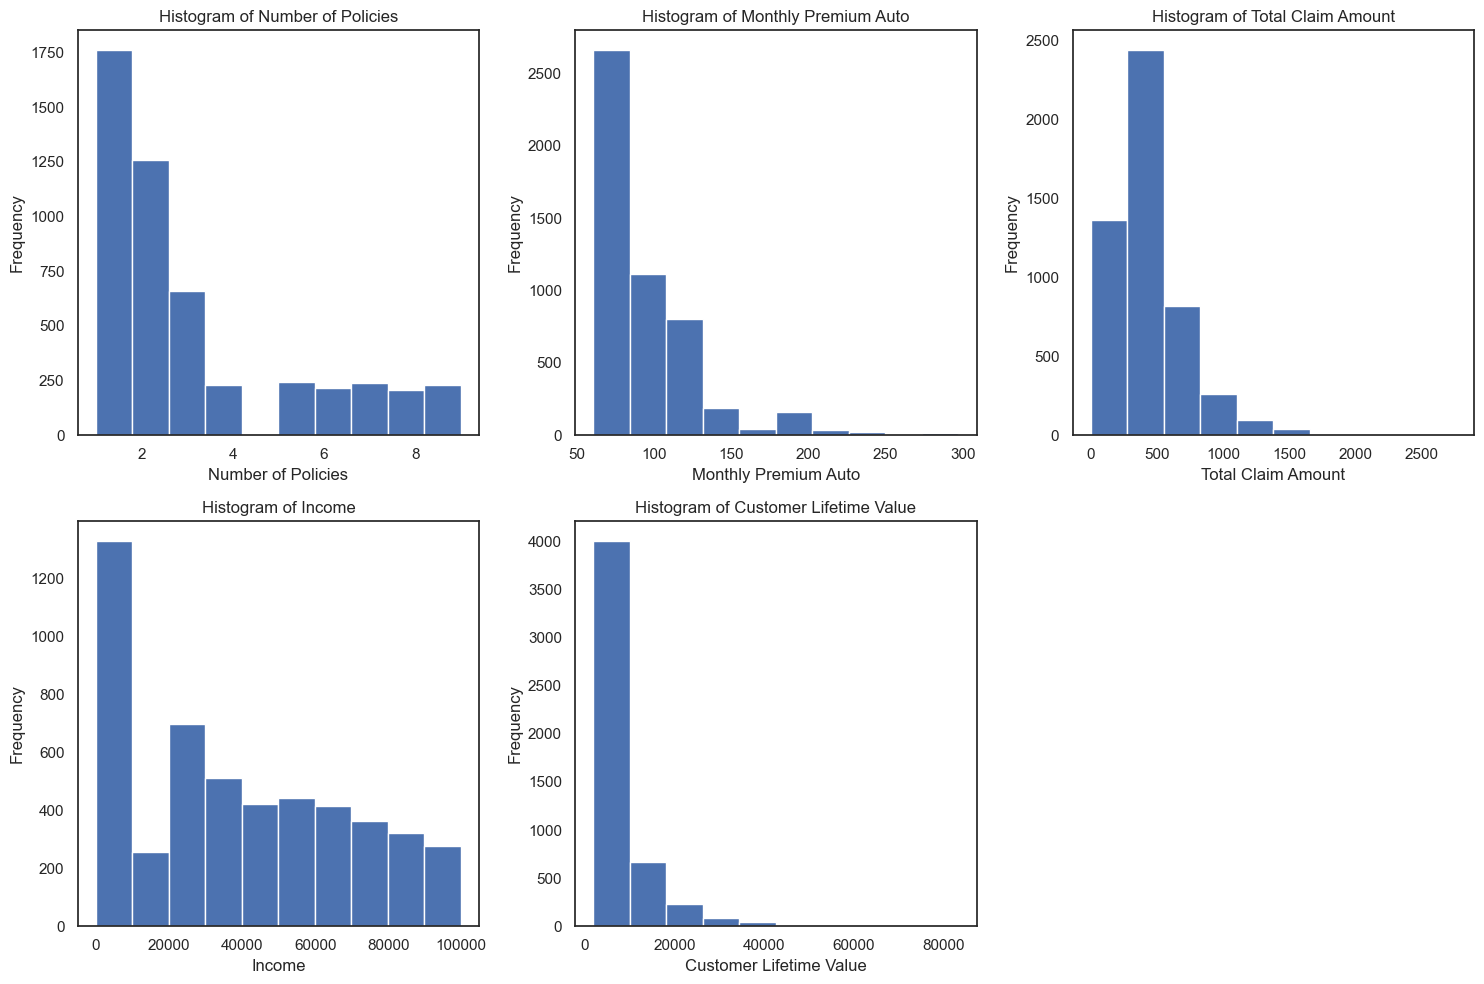

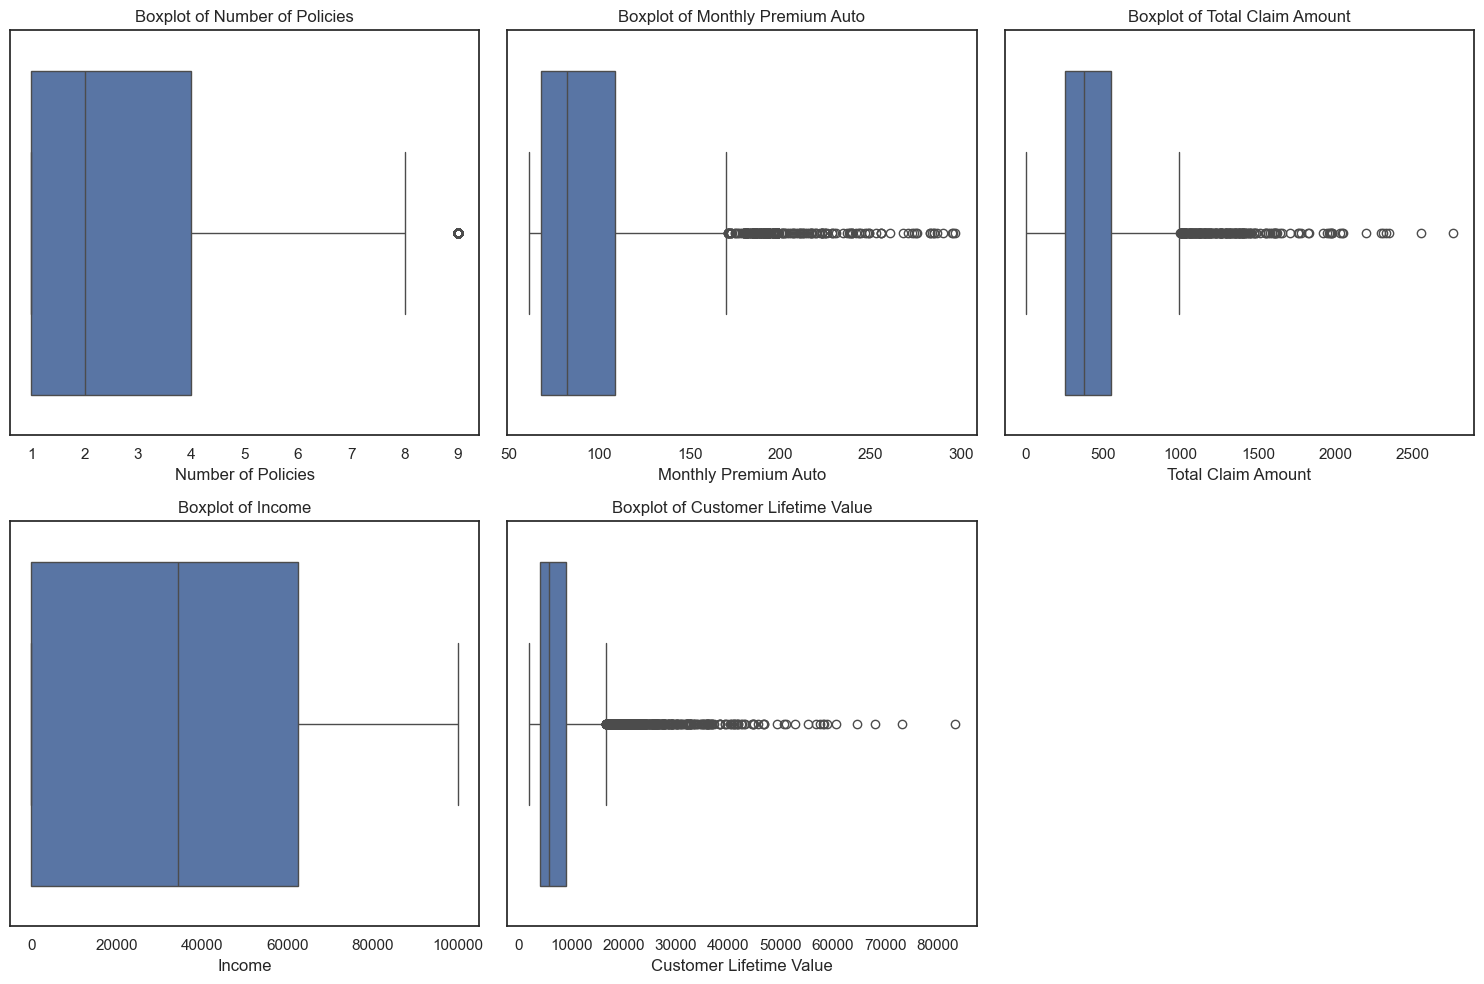

In [142]:
# Select integer-type columns
test_histogram = df_numerik
# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = -(-len(test_histogram.columns) // num_cols)  # Ceiling division to ensure enough rows for all columns

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize based on the number of rows

# Iterate over each column and plot histogram
for idx, column in enumerate(test_histogram.columns):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].hist(test_histogram[column], bins=10)
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Remove any unused subplots
for idx in range(len(test_histogram.columns), num_rows*num_cols):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()



# Select integer-type columns
test_boxplot = df_numerik

# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = -(-len(test_boxplot.columns) // num_cols)  # Ceiling division to ensure enough rows for all columns

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize based on the number of rows

# Iterate over each column and plot boxplot
for idx, column in enumerate(test_boxplot.columns):
    row = idx // num_cols
    col = idx % num_cols
    sns.boxplot(x=test_boxplot[column], ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_xlabel(column)

# Remove any unused subplots
for idx in range(len(test_boxplot.columns), num_rows*num_cols):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

As we can observe from the histogram, none of the numeric features exhibit a normal distribution.

Additionally, the box plot reveals the presence of outliers, which can introduce considerable variance. However, deleting outliers requires other considerations because we also need to account for the diversity of the data. Therefore, I will conduct another test, including correlation analysis and scatterplots, before making a decision.



### **Correlation Heatmap for each Numeric Features**

In [143]:
# pip install seaborn --upgrade

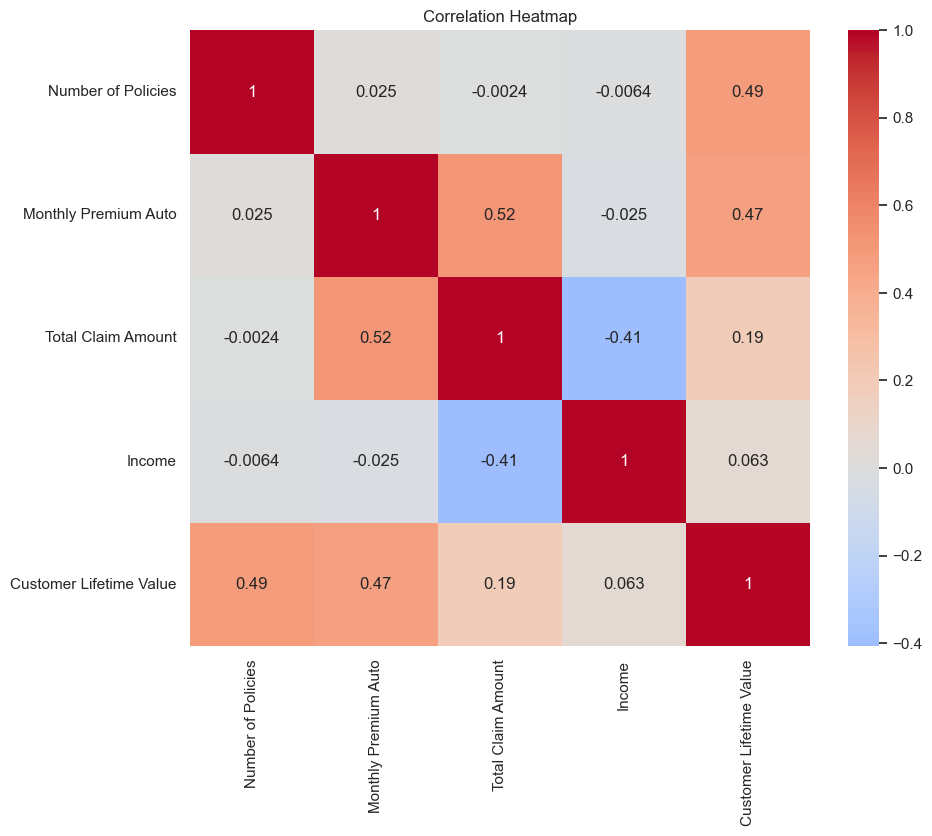

In [144]:
# Correlation heatmap for each feature
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_numerik.corr(method='spearman'),
            annot=True,   # Show correlation values on the heatmap
            cmap='coolwarm',   # Color map
            center=0)   # Mask to hide values with correlation less than 0.5

plt.title('Correlation Heatmap')
plt.show()


From the correlation heatmap, all the numeric features actually have low correlations, except for:

- Customer lifetime value has a moderate positive correlation with the number of policies. This can indicate that the more policies a customer has, the higher their Customer Lifetime Value may be.
- Customer Lifetime Value also has a moderate positive correlation with monthly premium auto, which can suggest that a higher premium they need to pay can result in a higher customer lifetime value.
- Total claim amount also has a moderate positive correlation with monthly premium auto. This implies that the higher the monthly premium they need to pay, the higher the possibility for the customer to claim.
- Total claim amount has a moderate negative correlation with income, meaning that lower income individuals have a higher chance to claim their 
insurance.

### **Scatterplot for each features with Customer Lifetime Value**

In [145]:
df_numerik.columns

Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income', 'Customer Lifetime Value'],
      dtype='object')

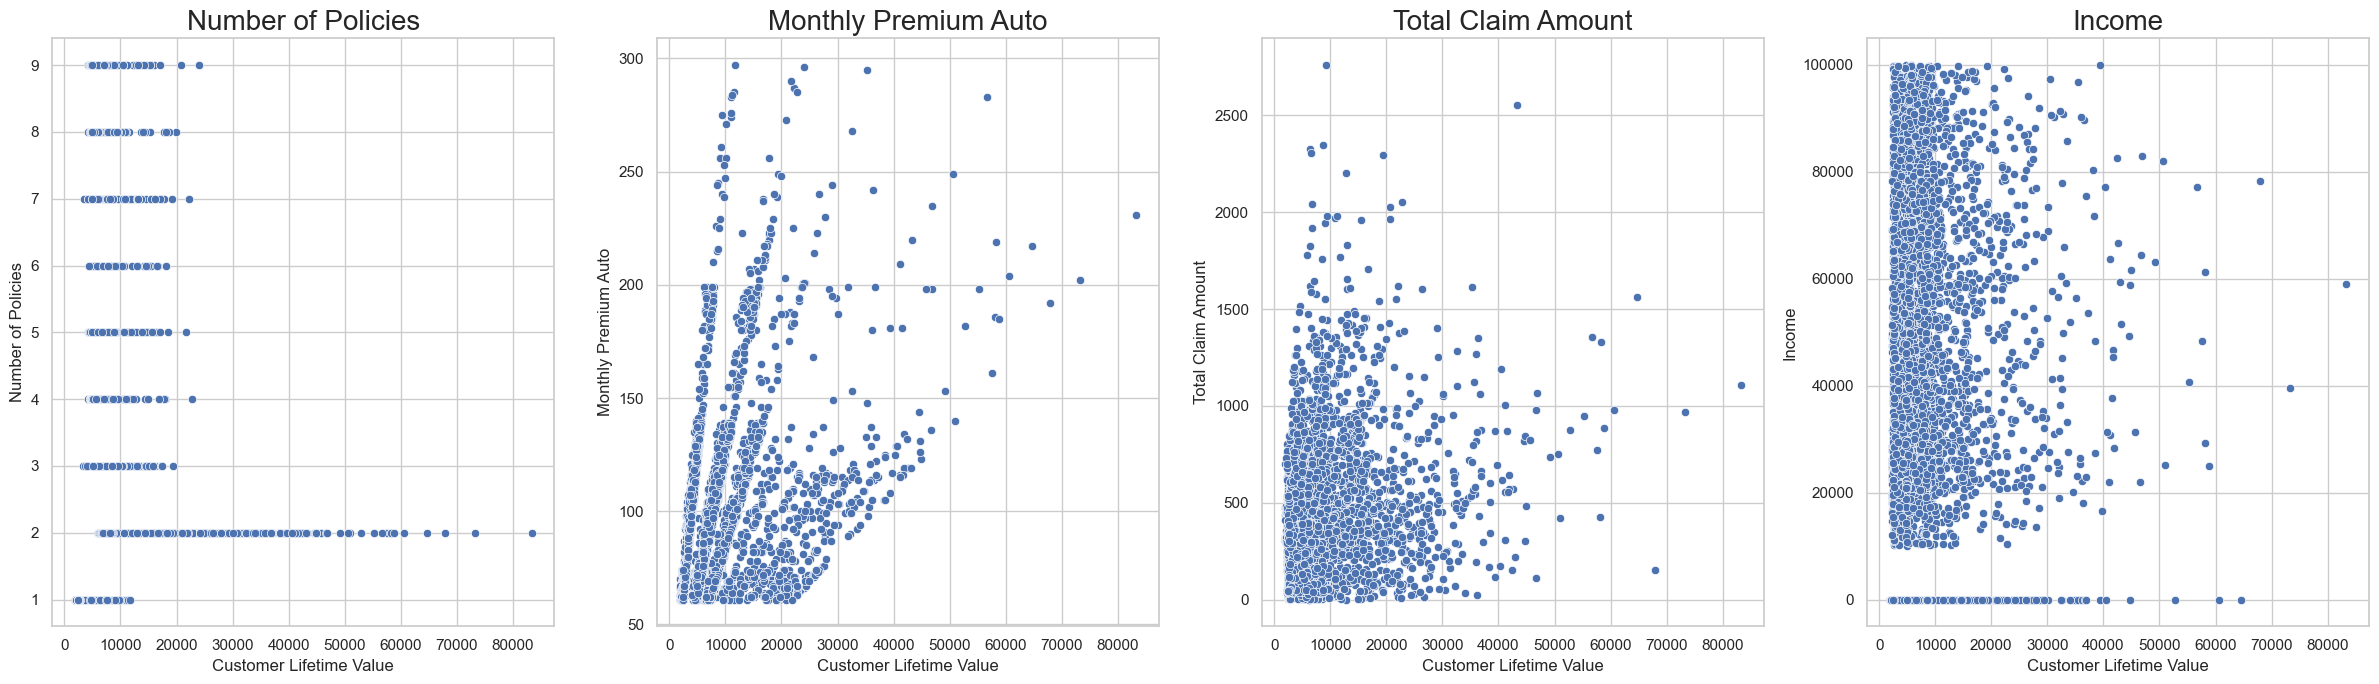

In [146]:
plt.figure(figsize=(30, 7), facecolor='white')  # Set figure size and background color
sns.set(style='whitegrid')  # Set grid style and color palette
plotnumber = 1

for feature in df_numerik.drop(columns='Customer Lifetime Value').columns:
    ax = plt.subplot(1, 5, plotnumber)
    sns.scatterplot(x='Customer Lifetime Value', y=feature, data=df)
    plt.xlabel('Customer Lifetime Value')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

plt.show()


Based on the scatterplot above, here are the insights:

1. **Number of Policies**<br>
    Customers with two policies can be considered for modeling because their data shows a wide range of variation. The CLV (Customer Lifetime Value) for these customers can vary from $10,000 to $80,000.
2. **Monthly Premium Auto**<br>
    There is a trend indicating that higher monthly premiums are associated with higher CLV. However, this correlation is not very strong, as there are instances where customers with lower premiums still have a high CLV.
3. **Total Claim Amount**<br>
    This variable does not exhibit a strong pattern or correlation with CLV.
4. **Income**<br>
    Income does not have any significant impact on customer lifetime value.

In [147]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [148]:
# Check quartil information from NUMBER OF POLICIES 
q3_number_of_policies = df['Number of Policies'].describe()['75%']
q1_number_of_policies = df['Number of Policies'].describe()['25%']
IQR_number_of_policies = q3_number_of_policies - q1_number_of_policies
print('Q3 of number of policies is', q3_number_of_policies)
print('Q1 of number of policies is', q1_number_of_policies)
print ('IQR number of policies is', IQR_number_of_policies)

upperbound_number_of_policies = q3_number_of_policies + (1.5*IQR_number_of_policies)
print(f'Upperbound of Number of Policies is {upperbound_number_of_policies}')

Q3 of number of policies is 4.0
Q1 of number of policies is 1.0
IQR number of policies is 3.0
Upperbound of Number of Policies is 8.5


In [149]:
# Check quartil information from MONTHLY PREMIUM AUTO 
q3_monthly_premium = df['Monthly Premium Auto'].describe()['75%']
q1_monthly_premium = df['Monthly Premium Auto'].describe()['25%']
IQR_monthly_premium = q3_monthly_premium - q1_monthly_premium
print('Q3 of Monthly Premium Auto is', q3_monthly_premium)
print('Q1 of Monthly Premium Auto is', q1_monthly_premium)
print ('IQR Monthly Premium Auto is', IQR_monthly_premium)

upperbound_monthly_premium = q3_monthly_premium + (1.5*IQR_monthly_premium)
print(f'Upperbound of Monthly Premium Auto is {upperbound_monthly_premium}')

Q3 of Monthly Premium Auto is 109.0
Q1 of Monthly Premium Auto is 68.0
IQR Monthly Premium Auto is 41.0
Upperbound of Monthly Premium Auto is 170.5


In [150]:
# Check quartil information from TOTAL CLAIM AMOUNT 
q3_total_claim = df['Total Claim Amount'].describe()['75%']
q1_total_claim = df['Total Claim Amount'].describe()['25%']
IQR_total_claim = q3_total_claim - q1_total_claim
print('Q3 of Total Claim Amount is', q3_total_claim)
print('Q1 of Total Claim Amount is', q1_total_claim)
print ('IQR Total Claim Amount is', IQR_total_claim)

upperbound_total_claim = q3_total_claim + (1.5*IQR_total_claim)
print(f'Upperbound of Total Claim Amount is {upperbound_total_claim}')

Q3 of Total Claim Amount is 548.1231215
Q1 of Total Claim Amount is 251.776304
IQR Total Claim Amount is 296.34681750000004
Upperbound of Total Claim Amount is 992.6433477500001


In [151]:
# Find the length of df that has total claim more than upperbound
print("Total data that total claim exceed it's upperbound is",len(df[df['Total Claim Amount'] > q3_total_claim]))
print('The proportion is',len(df[df['Total Claim Amount'] > q3_total_claim])/len(df))

Total data that total claim exceed it's upperbound is 1263
The proportion is 0.25004949514947533


To remove outliers, I will focus on the numeric features since the CLV formula significantly depends on the number of transactions and period. After examining the histograms, box plots, correlations, and scatter plots, I decided not to remove the outliers. This decision is based on the fact that there are no input errors (experimental errors); rather, the data shows genuine variability. This conclusion is supported by running the df.describe() function and checking the quartile data, which are still within normal limits. The most noticeable difference is in the Income feature, but based on the scatter plot and correlation, this data does not significantly impact CLV, so its variation can be ignored.

### **Analysis for Categoric Features**

In [152]:
# Find unique values for each categoric features
for i in df_kategorik.columns :
    print(i)
    print(df[i].unique())
    print('-------------------------')

Vehicle Class
['Four-Door Car' 'Two-Door Car' 'SUV' 'Sports Car' 'Luxury SUV'
 'Luxury Car']
-------------------------
Coverage
['Extended' 'Basic' 'Premium']
-------------------------
Renew Offer Type
['Offer1' 'Offer3' 'Offer2' 'Offer4']
-------------------------
EmploymentStatus
['Retired' 'Employed' 'Disabled' 'Medical Leave' 'Unemployed']
-------------------------
Marital Status
['Divorced' 'Married' 'Single']
-------------------------
Education
['High School or Below' 'College' 'Master' 'Bachelor' 'Doctor']
-------------------------


In [153]:
# Calculate the proportion for each categoric columns
for i in df_kategorik.columns :
    print((df[i].value_counts()/len(df) *100).round(2))
    print()
    print('-------------------------')

Vehicle Class
Four-Door Car    50.78
Two-Door Car     20.97
SUV              19.07
Sports Car        5.19
Luxury SUV        2.00
Luxury Car        2.00
Name: count, dtype: float64

-------------------------
Coverage
Basic       61.37
Extended    30.03
Premium      8.59
Name: count, dtype: float64

-------------------------
Renew Offer Type
Offer1    39.97
Offer2    29.80
Offer3    17.52
Offer4    12.71
Name: count, dtype: float64

-------------------------
EmploymentStatus
Employed         63.10
Unemployed       26.37
Medical Leave     4.59
Disabled          4.28
Retired           1.66
Name: count, dtype: float64

-------------------------
Marital Status
Married     59.12
Single      27.20
Divorced    13.68
Name: count, dtype: float64

-------------------------
Education
Bachelor                30.27
College                 29.18
High School or Below    28.71
Master                   7.86
Doctor                   3.98
Name: count, dtype: float64

-------------------------


In [154]:
from scipy.stats import kruskal
target = 'Customer Lifetime Value'

results = {}

for column in df_kategorik.columns:
    groups = [df[target][df[column] == category].values for category in df[column].unique()]
    stat, p_value = kruskal(*groups)
    results[column] = p_value
    print(f"Kruskal-Wallis test for {column}: p-value = {p_value}")

print()
print()

# To interpret the results:
for column, p_value in results.items():
    if p_value < 0.05:
        print(f"The feature '{column}' has a statistically significant relationship with the target (p-value = {p_value})")
    else:
        print(f"The feature '{column}' does not have a statistically significant relationship with the target (p-value = {p_value})")

Kruskal-Wallis test for Vehicle Class: p-value = 6.845692009848847e-167
Kruskal-Wallis test for Coverage: p-value = 2.8099076767503512e-68
Kruskal-Wallis test for Renew Offer Type: p-value = 6.12426178645605e-23
Kruskal-Wallis test for EmploymentStatus: p-value = 0.00028211274463910016
Kruskal-Wallis test for Marital Status: p-value = 0.09668289750106526
Kruskal-Wallis test for Education: p-value = 0.09115273275245567


The feature 'Vehicle Class' has a statistically significant relationship with the target (p-value = 6.845692009848847e-167)
The feature 'Coverage' has a statistically significant relationship with the target (p-value = 2.8099076767503512e-68)
The feature 'Renew Offer Type' has a statistically significant relationship with the target (p-value = 6.12426178645605e-23)
The feature 'EmploymentStatus' has a statistically significant relationship with the target (p-value = 0.00028211274463910016)
The feature 'Marital Status' does not have a statistically significant relationsh

From the Kruskal-Wallis test, among all the categorical features, only Marital Status and Education do not have a statistically significant relationship with Customer Lifetime Value. Meanwhile, Vehicle Class, Coverage, Renew Offer Type, and Employment Status do have a significant relationship with the target.

C:\Users\Intania\AppData\Local\Temp\ipykernel_7252\4198677619.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  renew_offer_plot = sns.countplot(data=df, x='Renew Offer Type', order=renew_offer_order, palette=['#5E17EB'] * len(renew_offer_order))


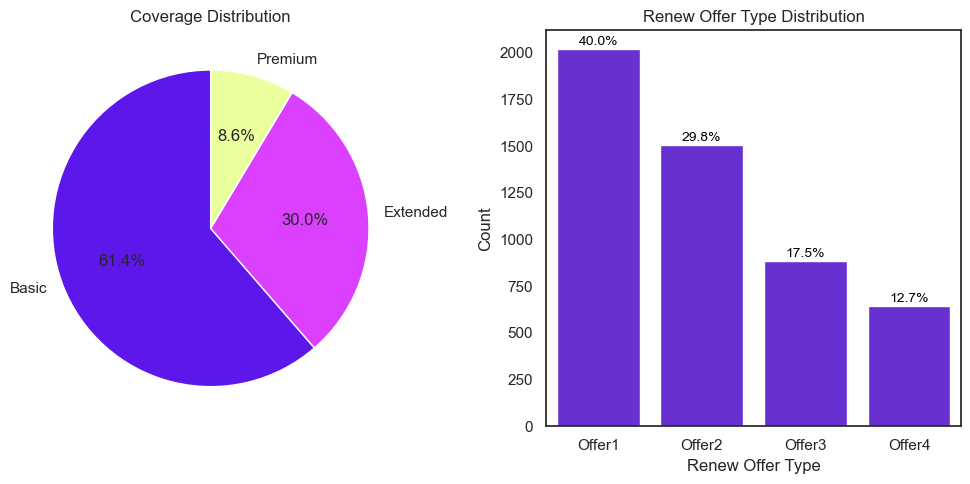

In [155]:
# Set the style to remove the horizontal grid lines for the bar chart
sns.set_style("white")

# Define the colors with the highest percentage having the color #5E17EB
coverage_colors =  ['#5E17EB', '#DC40FF', '#ECFF9F']

# Get the value counts for Coverage and sort them in descending order
coverage_counts = df['Coverage'].value_counts().sort_values(ascending=False)

# Create a figure with two subplots: one for the pie chart and one for the bar chart
plt.figure(figsize=(10, 5))

# Pie chart for the 'Coverage' column with the specific color for the highest percentage
plt.subplot(1, 2, 1)
coverage_counts.plot.pie(autopct='%1.1f%%', colors=coverage_colors, startangle=90)
plt.ylabel('')  # Hide the y-label for the pie chart
plt.title('Coverage Distribution')

# Bar chart for the 'Renew Offer Type' column sorted in descending order
plt.subplot(1, 2, 2)
renew_offer_order = df['Renew Offer Type'].value_counts().index
renew_offer_plot = sns.countplot(data=df, x='Renew Offer Type', order=renew_offer_order, palette=['#5E17EB'] * len(renew_offer_order))

# Annotate each bar with the percentage
total = len(df)
for p in renew_offer_plot.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.1f}%'
    renew_offer_plot.annotate(percentage, (p.get_x() + p.get_width() / 2., height), 
                              ha='center', va='center', fontsize=10, color='black', 
                              xytext=(0, 5), textcoords='offset points')

plt.xlabel('Renew Offer Type')
plt.ylabel('Count')
plt.title('Renew Offer Type Distribution')
plt.grid(False)

plt.tight_layout()
plt.show()


From the chart above, 61.4% of our customers buy the most basic package. Offer 1 and Offer 2 have good sales, while Offer 3 and Offer 4 can be improved to boost sales.

In [156]:
df_kategorik.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education'],
      dtype='object')

Text(0.5, 1.0, 'Coverage for each Employment Status')

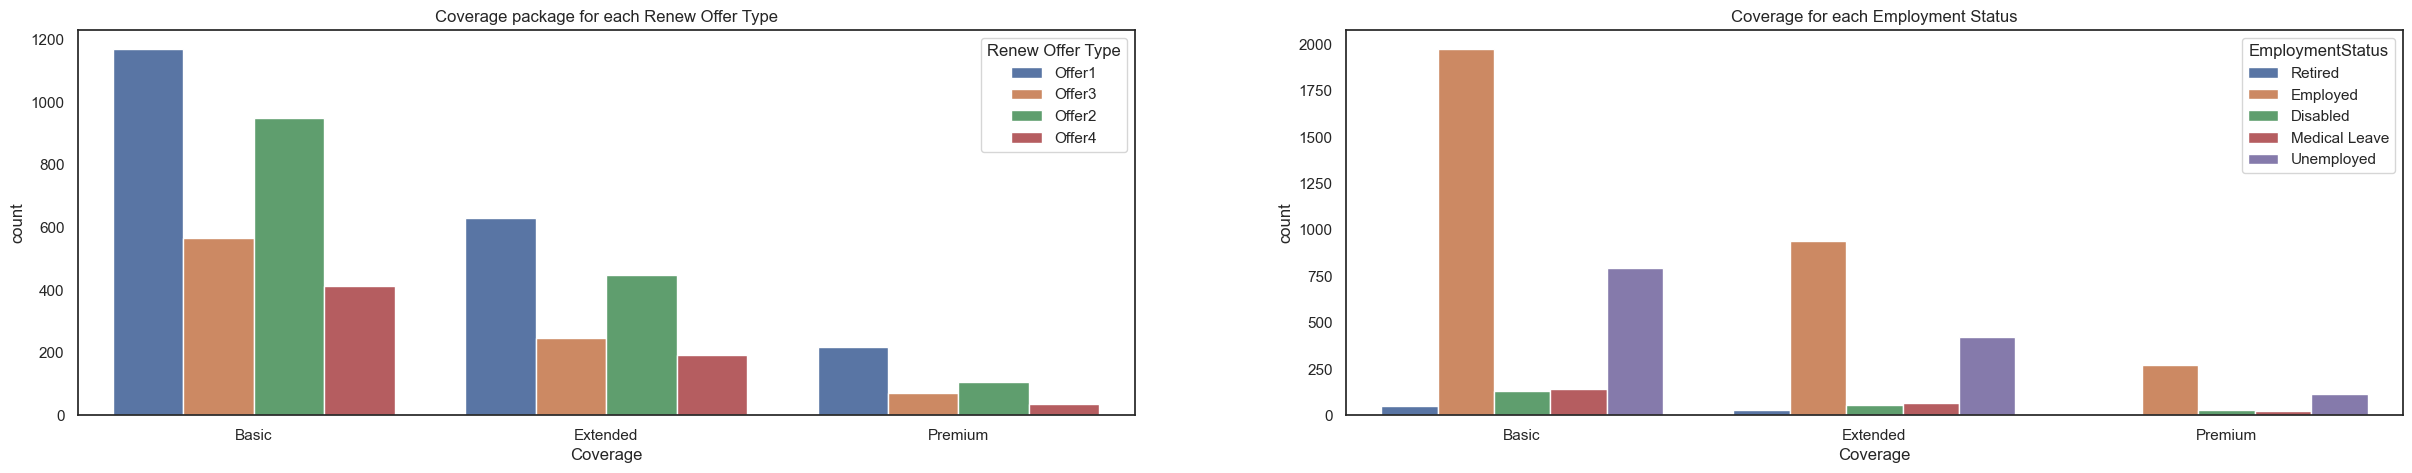

In [157]:
# Find relations between coverage and Renew Offer Type and EmploymentStatus
order = ['Basic','Extended','Premium']
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
sns.countplot(data = df, x='Coverage', hue ='Renew Offer Type', order=order)
plt.title('Coverage package for each Renew Offer Type')

plt.subplot(1,2,2)
sns.countplot(data = df, x='Coverage', hue ='EmploymentStatus', order=order)
plt.title('Coverage for each Employment Status')



In [158]:
# Show data that buy coverage in premium package
df[df['Coverage'] == 'Premium']

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
6,Four-Door Car,Premium,Offer2,Employed,Married,High School or Below,2.0,101.0,584.567645,25419.0,12052.984090
9,Four-Door Car,Premium,Offer3,Employed,Divorced,College,3.0,117.0,582.781896,59624.0,9156.322563
45,Four-Door Car,Premium,Offer2,Employed,Married,College,1.0,103.0,616.005527,25221.0,3818.468252
65,SUV,Premium,Offer1,Unemployed,Single,College,2.0,165.0,1452.213743,0.0,16350.130610
...,...,...,...,...,...,...,...,...,...,...,...
5614,Four-Door Car,Premium,Offer1,Employed,Married,High School or Below,1.0,113.0,542.400000,70340.0,4528.504890
5628,SUV,Premium,Offer1,Unemployed,Married,Bachelor,1.0,172.0,825.600000,0.0,6285.019179
5631,Four-Door Car,Premium,Offer1,Unemployed,Single,High School or Below,3.0,116.0,1193.115879,0.0,8491.465719
5662,Luxury Car,Premium,Offer2,Employed,Married,Doctor,9.0,296.0,498.159874,79655.0,23984.621440


In [159]:
print(len(df[df['Coverage'] == 'Premium']))
print('--------------')
df[df['Coverage'] == 'Premium']['Renew Offer Type'].value_counts()

434
--------------


Renew Offer Type
Offer1    218
Offer2    107
Offer3     72
Offer4     37
Name: count, dtype: int64

In [160]:
# Percentage of vehicle class ownership
percentage_overall = (df['Vehicle Class'].value_counts() / len(df) * 100).round(2)
percentage_overall

df_percentage_overall = pd.DataFrame(data=[percentage_overall.index,percentage_overall.values]).T
df_percentage_overall.columns = ['Vehicle Class','% Overall']
df_percentage_overall.set_index('Vehicle Class', inplace=True)
df_percentage_overall


,% Overall
Vehicle Class,
Four-Door Car,50.78
Two-Door Car,20.97
SUV,19.07
Sports Car,5.19
Luxury SUV,2.0
Luxury Car,2.0


In [161]:
# Combine data of vehicle class in Premium dataset and the overall dataset to know the percentage for each vehicle class
df_premium = pd.pivot_table(data=df[df['Coverage'] == 'Premium'], index='Vehicle Class', columns='Coverage', values='EmploymentStatus', aggfunc='count').sort_values(by='Premium',ascending=False)
df_premium ['% Premium'] = df_premium['Premium'] / len(df[df['Coverage'] == 'Premium']) * 100
df_premium = pd.concat([df_premium,df_percentage_overall],axis=1)
df_premium

,Premium,% Premium,% Overall
Vehicle Class,,,
Four-Door Car,212,48.847926,50.78
SUV,89,20.506912,19.07
Two-Door Car,85,19.585253,20.97
Sports Car,27,6.221198,5.19
Luxury Car,11,2.534562,2.0
Luxury SUV,10,2.304147,2.0


In [162]:
df[df['Vehicle Class']=='Four-Door Car']['Marital Status'].value_counts()/len(df)*100

Marital Status
Married     29.776282
Single      13.680459
Divorced     7.325282
Name: count, dtype: float64

In [163]:
pd.pivot_table(data=df,index='Vehicle Class',columns='Marital Status',values ='EmploymentStatus',aggfunc='count')

Marital Status,Divorced,Married,Single
Vehicle Class,,,
Four-Door Car,370,1504,691
Luxury Car,5,58,38
Luxury SUV,13,59,29
SUV,130,576,257
Sports Car,40,151,71
Two-Door Car,133,638,288


In [164]:
# Find median CLV for each coverage
print(f" The median Customer Lifetime Value of Basic Coverage Customer is {df[df['Coverage'] == 'Basic']['Customer Lifetime Value'].median()}")
print(f" The median Customer Lifetime Value of Extended Coverage Customer is {df[df['Coverage'] == 'Extended']['Customer Lifetime Value'].median()}")
print(f" The median Customer Lifetime Value of Premium Coverage Customer is {df[df['Coverage'] == 'Premium']['Customer Lifetime Value'].median()}")

 The median Customer Lifetime Value of Basic Coverage Customer is 5282.937237
 The median Customer Lifetime Value of Extended Coverage Customer is 6727.617003
 The median Customer Lifetime Value of Premium Coverage Customer is 8688.813


From the countplot above, here are some insights:

- Renew offer type 1 is the most popular, followed by types 2, 3, and 4.

- All customers purchased a renew offer, indicated by comparing the total number of entries with the count of entries for df['Renew Offer Type']. This suggests strong customer interest in the product.

- Further investigation is advisable for renew types 3 and 4 to potentially attract more customers, as this dataset lacks detailed explanations.

- Basic coverage is the most popular, accounting for approximately 61.33% of purchases, followed by extended coverage at 30.06%, and premium coverage at 8.03%.

- The majority of customers own four-door cars, indicating a higher likelihood of having families.

- Time series analysis could reveal incremental changes in marital status, informing marketing strategies. As the single market segment also holds significant potential, it warrants development with appropriate strategies.

<hr>

## **4. Define X and y**

In [165]:
X = df.drop(columns='Customer Lifetime Value')
y = df['Customer Lifetime Value']

<hr>

## **5. Data Preprocessing**

In [166]:
X.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0


In [167]:
X['Number of Policies'].nunique()

9

**One Hot Encoding - Nominal Category** <br>
'Vehicle Class','Renew Offer Type', 'EmploymentStatus', 'Marital Status'

**Ordinal Encoding - Ordinal Category** <br>
'Coverage', 'Education' <br>
- Coverage is in ordinal encoding because each type has different features, and insurance companies typically differentiate based on the products customers choose.
- Education is also in ordinal encoding due to the higher levels.

**RobustScaler** <br>
'Monthly Premium Auto','Number of Policies', 'Total Claim Amount', 'Income' <br>
- All these numeric features are being scaled using the robust scaler because they do not follow a normal distribution. 

https://oto.detik.com/mobil/d-3651979/apa-bedanya-asuransi-mobil-mewah-dengan-mobil-biasa


In [168]:
# Splitting data training and test with proportion 70 : 30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

In [169]:
# Find unique values in Coverage and Education
print(X['Coverage'].unique())
print(X['Education'].unique())

['Extended' 'Basic' 'Premium']
['High School or Below' 'College' 'Master' 'Bachelor' 'Doctor']


In [170]:
# Prepare the mapping for ordinal encoder
ordinal_mapping = [
    {'col': 'Coverage', 'mapping': {'Extended': 2, 'Basic': 1, 'Premium': 3}},
    {'col': 'Education', 'mapping': {'High School or Below': 1, 'College': 2, 'Bachelor': 3, 'Master': 4, 'Doctor': 5}}
]

In [171]:
# Create column transformer for data preprocessing
transformer = ColumnTransformer ([
                    ('oneHot',OneHotEncoder(drop='first'), ['Vehicle Class','Renew Offer Type', 'EmploymentStatus', 'Marital Status']),
                    ('ordinal_encoding', OrdinalEncoder(mapping = ordinal_mapping), ['Coverage', 'Education']),
                    ('robustscale',RobustScaler(),['Monthly Premium Auto', 'Number of Policies','Total Claim Amount', 'Income'])
], remainder='passthrough')

<hr>

## **6. Cross Validation**

In [172]:
# Define algorithm
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# The modeling was performed on a logarithmic scale but was then inversely transformed back for interpretation.
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)


models = [log_lr, log_knn, log_dt, log_rf, log_xgb]


score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Find the best algorithm based on the metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-6434.67170635 -6737.69383383 -7100.97469814 -6454.117572
 -6009.35085641] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-3569.79461848 -3560.60424438 -3703.73360729 -3604.6373621
 -3462.29047068] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.42376596 -0.41649523 -0.42024783 -0.41608541 -0.4298823 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-6439.20505202 -6610.44255319 -7172.04267336 -6370.3517159
 -6018.23202826] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-3526.14854029 -3556.68952911 -3705.47239867 -3548.35360971
 -3377.39651094] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                        

In [173]:
# Result from the 5 algorithm that are being used 
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-6547.361733,361.541932,-3580.212061,77.785164,-0.421295,0.005121
1,KNN Regressor,-6522.054805,377.892027,-3542.812118,104.232102,-0.433071,0.007408
2,DecisionTree Regressor,-5492.227157,278.156580,-1971.717225,117.087896,-0.143478,0.010281
3,RandomForest Regressor,-4010.958456,279.097589,-1588.289566,70.575850,-0.109424,0.003212
4,XGBoost Regressor,-4198.323681,262.894437,-1732.147411,92.001286,-0.129880,0.003895


The data in this dataset has a lot of outlier and there are a lot of variance , that's why the best score can be used in MAE and MAPE, where the lowest score of mean and std of MAE and MAPE are Random Forest Regressor and XGBoost Regressor 

**Predict to test set**

In [174]:
# define model
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Transformed the model into a logarithmic scale, and then inverted it for interpretation.
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Another benchmark with the best 2 models
models = {
    'XGB_benchmark': log_xgb,
    'RF_benchmark': log_rf
}

score_rmse = []
score_mae = []
score_mape = []

# Prediction to test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB_benchmark,4300.207038,1706.533422,0.126670
RF_benchmark,4112.975827,1589.407950,0.108976


Both models produced good results, with the cross-validation scores and the results from actual modeling being similar. Additionally, the test set yielded lower MAE and MAPE scores.

<hr>

## **7. Experiment 1 : Random Forest**

### **7.a Hyperparameter Tuning**

In [175]:

# Define the hyperparameter search space
hyperparam_space_random_forest = {
    'model__regressor__max_depth': range(2, 30, 1), 
    'model__regressor__n_estimators': range(50, 150, 20),
    'model__regressor__min_samples_leaf': range(20, 100, 1),
    'model__regressor__min_samples_split': range(2, 100, 1),
    'model__regressor__min_impurity_decrease': np.arange(0, 0.1, 0.01)
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=1)

# Apply logarithmic transformation to the target variable
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)

# Create the pipeline (Assume 'transformer' is defined elsewhere)
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('model', log_rf)
])

# Define cross-validation strategy
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning with RandomizedSearchCV
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions=hyperparam_space_random_forest,
    n_iter=500,
    cv=crossval, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs=-1,
    refit='neg_mean_absolute_percentage_error',  # Choose one score to optimize
    random_state=1  
)




### **7.b Fit to model**

In [176]:
# Fit to X_train y_train
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('oneHot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'EmploymentStatus',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal_encoding',
                                                                               OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                        'data...
                                        'model__regressor__min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'model__regressor__min_samples_leaf': range(20, 100),
                                        'model__regressor__min_samples_split': range(2, 100),
                                        'model__regressor__n_estimators': range(50, 150, 20)},
                   random_state=1, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [177]:
# Tuning's result and then sort based on RMSE, MAE, & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__n_estimators,param_model__regressor__min_samples_split,param_model__regressor__min_samples_leaf,param_model__regressor__min_impurity_decrease,param_model__regressor__max_depth,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
464,1.499982,0.006049,0.049278,0.004889,130,53,20,0.0,26,"{'model__regressor__n_estimators': 130, 'model...",...,104.569931,1,-0.109176,-0.110468,-0.119913,-0.112509,-0.108879,-0.112189,0.004068,1
473,1.480001,0.017832,0.045752,0.004149,130,58,21,0.0,9,"{'model__regressor__n_estimators': 130, 'model...",...,105.943990,3,-0.110052,-0.111391,-0.120981,-0.113173,-0.109853,-0.113090,0.004120,4
53,0.835993,0.034805,0.033459,0.004358,70,5,25,0.0,11,"{'model__regressor__n_estimators': 70, 'model_...",...,122.473975,2,-0.109295,-0.110454,-0.121955,-0.112508,-0.107536,-0.112350,0.005067,2
389,0.576548,0.018731,0.032345,0.005797,50,84,24,0.0,12,"{'model__regressor__n_estimators': 50, 'model_...",...,115.918124,6,-0.114870,-0.113694,-0.126425,-0.117976,-0.113076,-0.117208,0.004908,6
480,1.480932,0.030987,0.046932,0.003423,130,33,26,0.0,8,"{'model__regressor__n_estimators': 130, 'model...",...,121.931626,4,-0.109582,-0.111581,-0.122344,-0.113394,-0.108053,-0.112991,0.005013,3


In [178]:
print('Random Forest Regressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest Regressor
Best_score: -0.11218891996734577
Best_params: {'model__regressor__n_estimators': 130, 'model__regressor__min_samples_split': 53, 'model__regressor__min_samples_leaf': 20, 'model__regressor__min_impurity_decrease': 0.0, 'model__regressor__max_depth': 26}


### **7.c Predict to Test Set with the Tuned Model**

In [179]:
# Model Random Forest
model = {'RF_after_tuning': RandomForestRegressor(random_state=1)}

# Define model with the best estimator
rf_tuning = random_rf.best_estimator_

# Fit the model
rf_tuning.fit(X_train, y_train)

# Predict to test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# RMSE, MAE, MAPE score
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning_rf

,RMSE,MAE,MAPE
RF_after_tuning,4085.312043,1622.859368,0.11142


In [180]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RF_benchmark']).T

,RMSE,MAE,MAPE
RF_benchmark,4112.975827,1589.40795,0.108976


After performing hyperparameter tuning, the MAPE and MAE results were higher compared to the benchmark Random Forest (RF) model. Therefore, I will choose the RF model without any tuning.

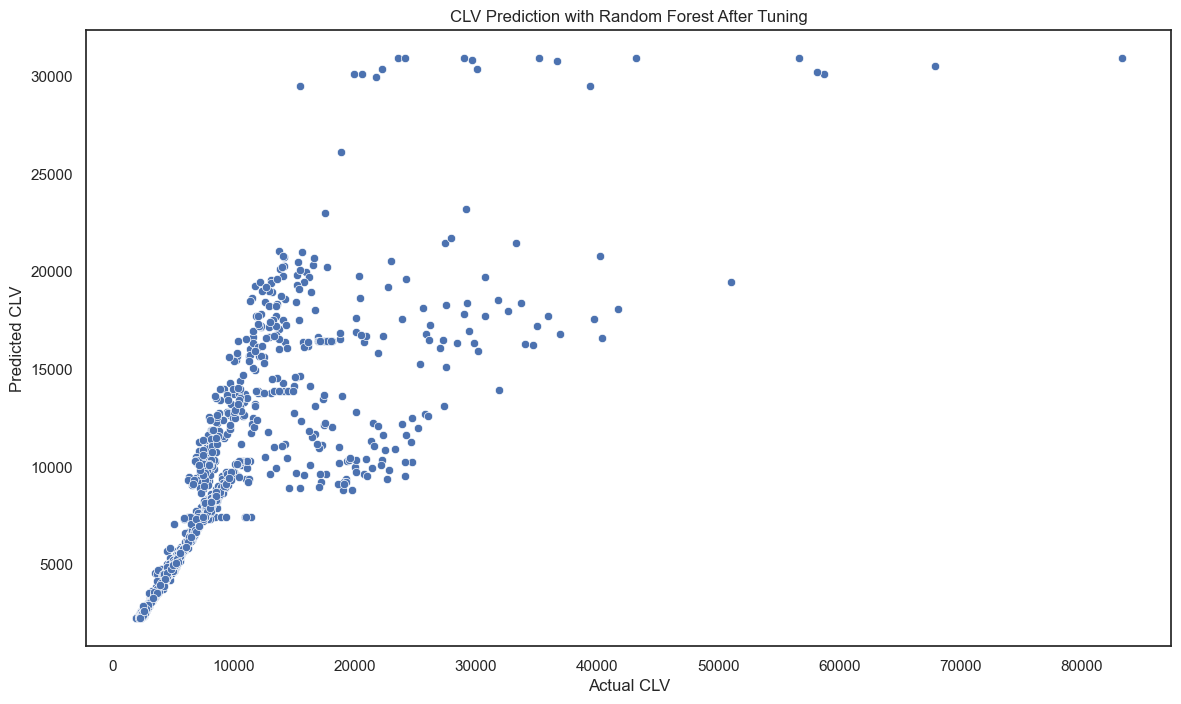

In [181]:
# Create scatterplot for predicted and actual CLV
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='CLV Prediction with Random Forest After Tuning', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV');

In [182]:
# Calculate residuals
residuals = y_test - y_pred_rf_tuning

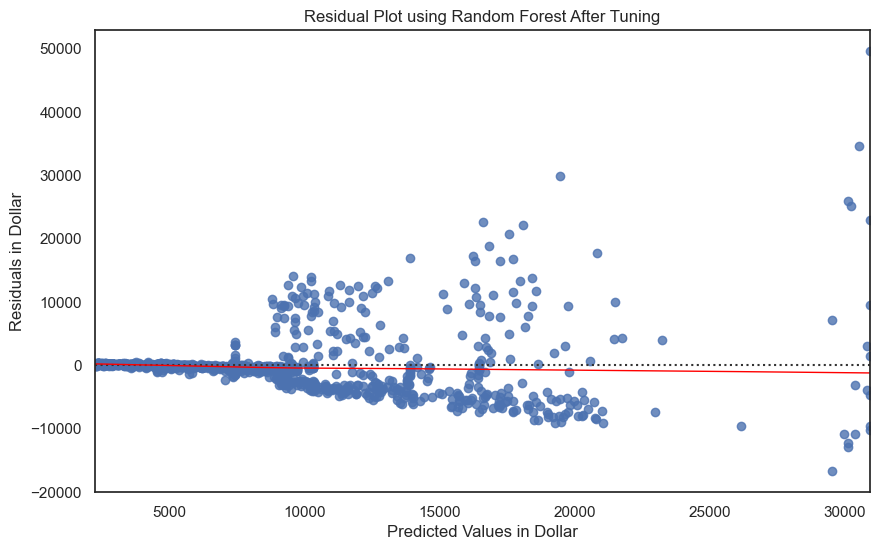

In [183]:
# Create a residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf_tuning, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values in Dollar')
plt.ylabel('Residuals in Dollar')
plt.title('Residual Plot using Random Forest After Tuning')
plt.show()

From the residual plot results, this model performs well when calculating CLV values under $9,000. Beyond this point, there is significant variance in the errors, indicating the need for further experimentation with different features.

<hr>

## **8. Experiment 2 : XGB Boost**

### **8.a Hyperparameter Tuning**

In [184]:
# Define hyperparameter search space with correct prefix
hyperparam_space_xgb = {
    'model__regressor__max_depth': list(np.arange(1, 11)),
    'model__regressor__learning_rate': list(np.arange(1, 100)/100),
    'model__regressor__n_estimators': list(np.arange(100, 201)),
    'model__regressor__subsample': list(np.arange(2, 10)/10),
    'model__regressor__gamma': list(np.arange(1, 11)),
    'model__regressor__colsample_bytree': list(np.arange(1, 10)/10),
    'model__regressor__reg_alpha': list(np.logspace(-3, 1, 10))
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=1)

# Apply logarithmic transformation to the target variable
log_xgb = TransformedTargetRegressor(regressor=xgb, func=np.log, inverse_func=np.exp)

# Define the pipeline (Assume 'transformer' is defined elsewhere)
estimator_xgb = Pipeline([
    ('preprocessing', transformer),
    ('model', log_xgb)
])

# Define cross-validation strategy
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning with RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions=hyperparam_space_xgb,
    n_iter= 300,
    cv=crossval, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs=-1,
    refit='neg_mean_absolute_percentage_error',  # Choose one metric for optimization
    random_state=1
)



In [185]:
# Fit data
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('oneHot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'EmploymentStatus',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal_encoding',
                                                                               OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                        'data...
                                                                        0.007742636826811269,
                                                                        0.021544346900318832,
                                                                        0.05994842503189409,
                                                                        0.1668100537200059,
                                                                        0.46415888336127775,
                                                                        1.2915496650148828,
                                                                        3.593813663804626,
                                                                        10.0],
                                        'model__regressor__subsample': [0.2,
                                                                        0.3,
                                                                        0.4,
                                                                        0.5,
                                                                        0.6,
                                                                        0.7,
                                                                        0.8,
                                                                        0.9]},
                   random_state=1, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [186]:
# Show the scores for each tuning
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__subsample,param_model__regressor__reg_alpha,param_model__regressor__n_estimators,param_model__regressor__max_depth,param_model__regressor__learning_rate,param_model__regressor__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
166,0.159118,0.010568,0.018881,0.002682,0.7,0.059948,139,8,0.67,1,...,94.637804,37,-0.120330,-0.119450,-0.131562,-0.127346,-0.119521,-0.123642,0.004939,32
103,0.181614,0.007169,0.021427,0.004497,0.9,0.001,186,5,0.63,1,...,80.941132,18,-0.117127,-0.121574,-0.126364,-0.118118,-0.116802,-0.119997,0.003606,22
10,0.150925,0.006071,0.021342,0.009258,0.4,0.059948,124,4,0.84,1,...,120.586081,78,-0.128449,-0.133000,-0.146111,-0.134764,-0.124288,-0.133323,0.007363,80
109,0.182286,0.007564,0.017846,0.005186,0.4,0.059948,168,2,0.44,1,...,85.364229,35,-0.123584,-0.115778,-0.132891,-0.121753,-0.127458,-0.124293,0.005717,35
61,0.180389,0.014987,0.021432,0.008238,0.9,0.007743,169,10,0.28,1,...,84.461247,7,-0.113118,-0.114452,-0.123682,-0.115845,-0.114906,-0.116401,0.003745,6


In [187]:
# Show score and best parameter
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -0.1105154443036362
Best_params: {'model__regressor__subsample': 0.9, 'model__regressor__reg_alpha': 0.021544346900318832, 'model__regressor__n_estimators': 141, 'model__regressor__max_depth': 4, 'model__regressor__learning_rate': 0.09, 'model__regressor__gamma': 1, 'model__regressor__colsample_bytree': 0.7}


### **8.b Predict to Test Set**

In [188]:
# Model XGBoost
model = {'XGB_after_tuning': XGBRegressor(random_state=1)}

# Define model with the best estimator
xgb_tuning = random_xgb.best_estimator_

# Fit to model
xgb_tuning.fit(X_train, y_train)

# Predict to test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# MSE, MAE & MAPE after tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGB_after_tuning,4173.278992,1601.724166,0.111639


In [189]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB_benchmark']).T

,RMSE,MAE,MAPE
XGB_benchmark,4300.207038,1706.533422,0.12667


Using the XGB model, we can achieve better results with hyperparameter tuning with the best params are : 
- 'model__regressor__subsample': 0.9, 
- 'model__regressor__reg_alpha': 0.021544346900318832, 
- 'model__regressor__n_estimators': 141, 
- 'model__regressor__max_depth': 4, 
- 'model__regressor__learning_rate': 0.09, 
- 'model__regressor__gamma': 1, 
- 'model__regressor__colsample_bytree': 0.7

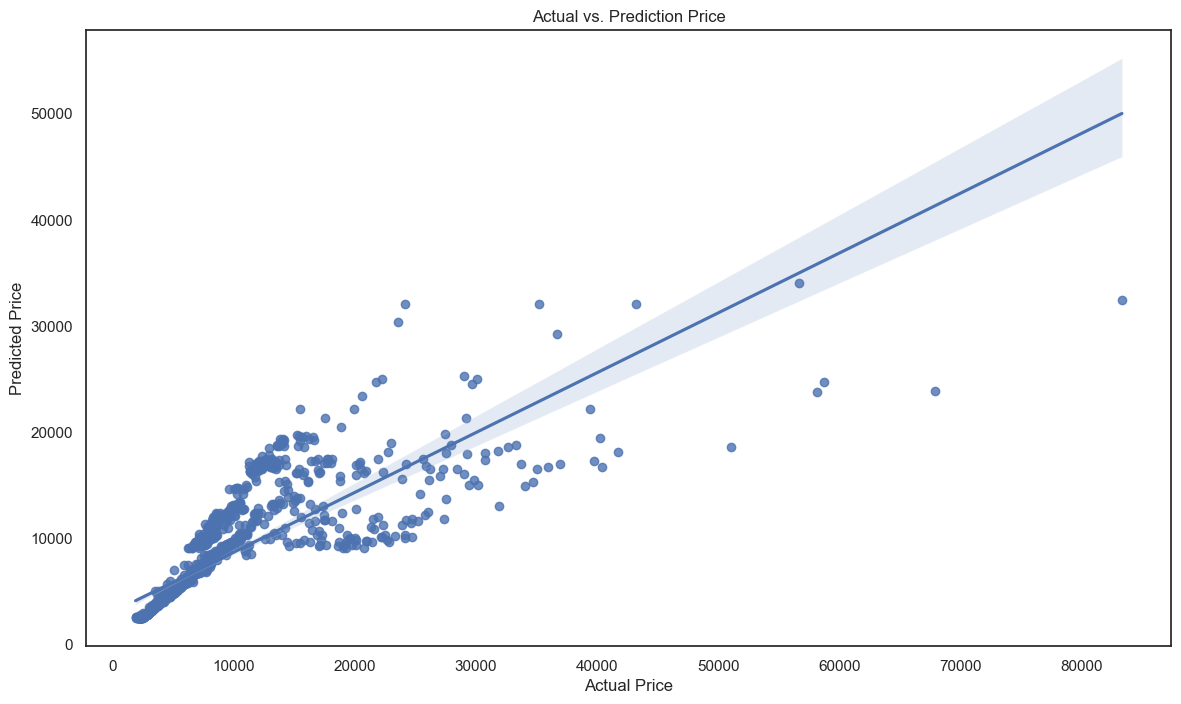

In [190]:
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

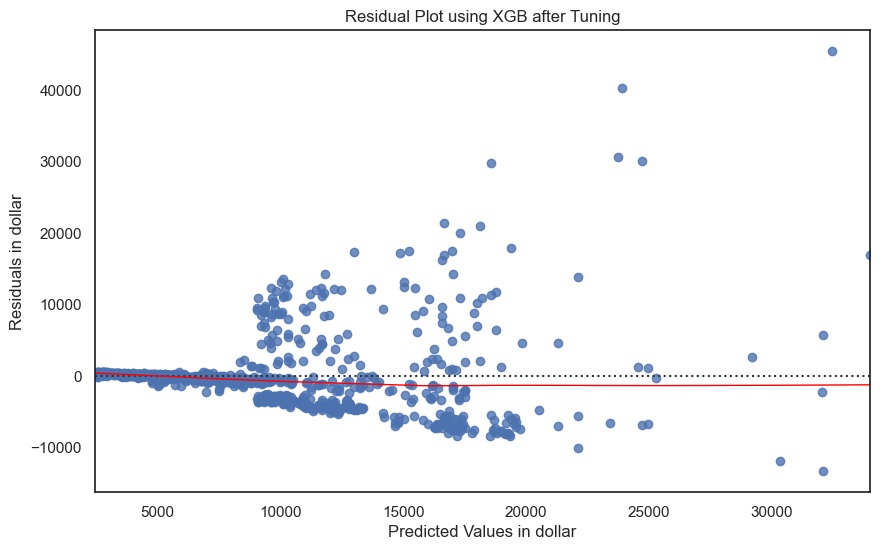

In [191]:
# Calculate residuals
residuals = y_test - y_pred_xgb_tuning

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_xgb_tuning, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values in dollar')
plt.ylabel('Residuals in dollar')
plt.title('Residual Plot using XGB after Tuning')
plt.show()

### **8.c Comparison Result**

In [192]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RF_benchmark']).T

,RMSE,MAE,MAPE
RF_benchmark,4112.975827,1589.40795,0.108976


In [193]:
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGB_after_tuning,4173.278992,1601.724166,0.111639


We also compared the Random Forest model without hyperparameter tuning from the previous experiment to the XGBoost model after hyperparameter tuning. The results showed that the Random Forest model had better scores in RMSE, MAE, and MAPE. Therefore, we will choose the Random Forest model.

**Fit Random Forest to the X_test**

In [194]:
# Define model
rf = RandomForestRegressor(random_state=1)

# Transform the model into a logarithmic scale, and then invert it for interpretation
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)

# Prepare the pipeline (Assume 'transformer' is defined elsewhere)
model = Pipeline([
    ('preprocessing', transformer),
    ('model', log_rf)
])

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE, MAE, MAPE scores
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = mean_absolute_error(y_test, y_pred)
mape_rf = mean_absolute_percentage_error(y_test, y_pred)

# Create a DataFrame to store the scores
score_after_rf_final = pd.DataFrame({'RMSE': [rmse_rf], 'MAE': [mae_rf], 'MAPE': [mape_rf]}, index=['RF_final_result'])

# Display the scores
score_after_rf_final


,RMSE,MAE,MAPE
RF_final_result,4112.975827,1589.40795,0.108976


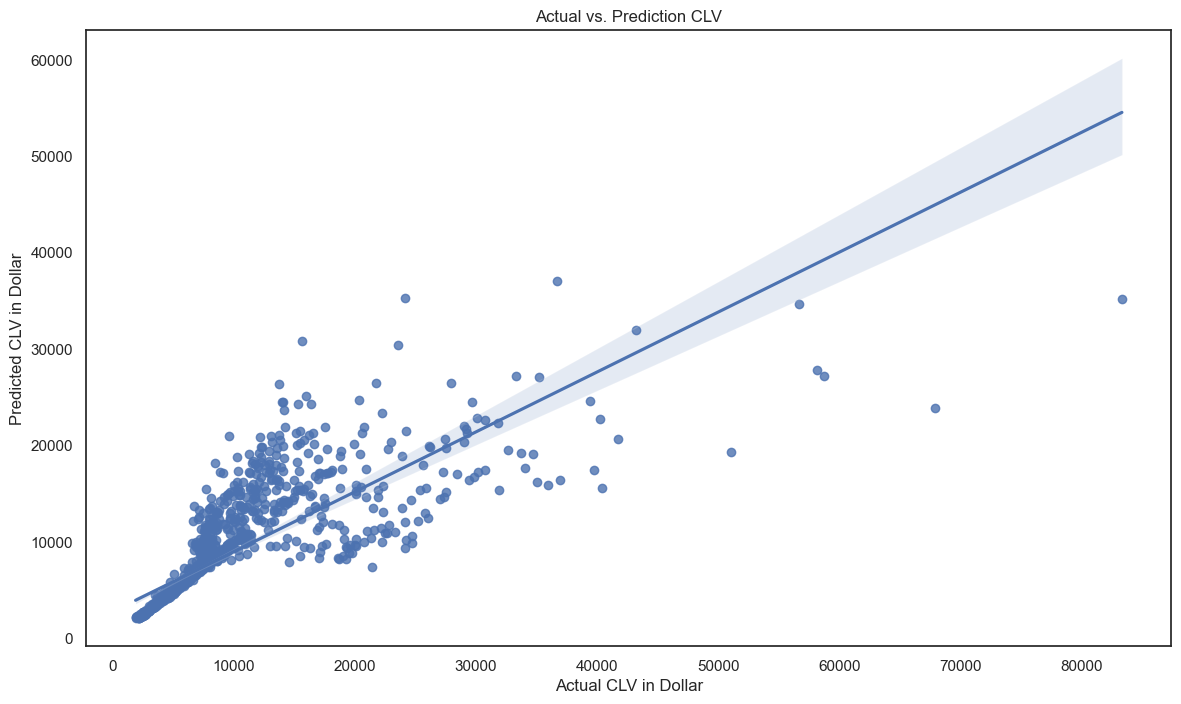

In [195]:
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred).set(title='Actual vs. Prediction CLV', 
                                               xlabel='Actual CLV in Dollar', 
                                               ylabel='Predicted CLV in Dollar');

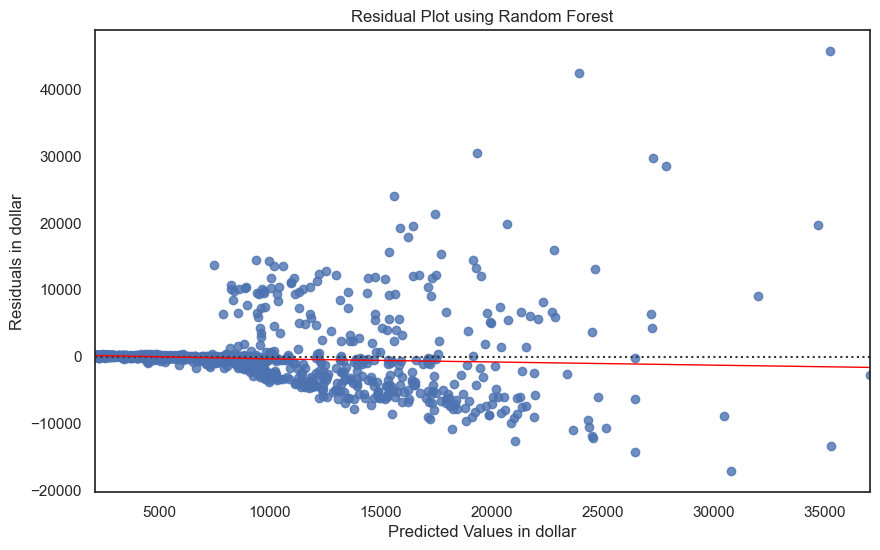

In [196]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values in dollar')
plt.ylabel('Residuals in dollar')
plt.title('Residual Plot using Random Forest')
plt.show()

**Find the best feature**

In [197]:
# Extract the RandomForestRegressor from the pipeline
rf_model = model.named_steps['model'].regressor_

# Access feature importances
feature_importances = rf_model.feature_importances_

feature_importances


array([5.31416380e-05, 1.92280506e-04, 7.48472645e-04, 6.39886663e-04,
       2.22789608e-03, 3.62185692e-03, 2.74348150e-03, 2.51702963e-03,
       2.66653505e-03, 1.50286485e-03, 6.13693536e-04, 1.20021612e-03,
       3.02571233e-03, 2.71624619e-03, 4.81418699e-03, 8.65822702e-03,
       2.31266441e-01, 6.83336552e-01, 2.44790703e-02, 2.29762089e-02])

In [198]:
# Extract the one-hot encoder from the transformer
onehot_encoder = transformer.named_transformers_['oneHot']

# Get feature names from the one-hot encoder
col_onehot = list(onehot_encoder.get_feature_names_out())

# Display the one-hot encoded feature names
print(col_onehot)

['Vehicle Class_Luxury Car', 'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Marital Status_Married', 'Marital Status_Single']


In [199]:
# Extract the encoder from the transformer
ordinal_encoder = transformer.named_transformers_['ordinal_encoding']

# Get feature names from the  encoder
col_ordinal = list(ordinal_encoder.get_feature_names_out())

# Display the feature names
print(col_ordinal)

['Coverage', 'Education']


In [200]:
# Extract the encoder from the transformer
robust_scaler = transformer.named_transformers_['robustscale']

# Get feature names from the  encoder
col_robust = list(robust_scaler.get_feature_names_out())

# Display the feature names
print(col_robust)

['Monthly Premium Auto', 'Number of Policies', 'Total Claim Amount', 'Income']


In [201]:
# Combine all columns name
all_cols = col_onehot + col_ordinal + col_robust 
all_cols
print(len(all_cols))

20


In [202]:
# Create dataframe to show feature and the value of each coefficient
df_koefisien = pd.DataFrame(data = feature_importances,
             index=all_cols )

df_koefisien.reset_index(inplace=True)
df_koefisien.columns = ['feature','importance']
df_koefisien = df_koefisien.sort_values(by='importance',ascending=False)
df_koefisien

,feature,importance
17,Number of Policies,0.683337
16,Monthly Premium Auto,0.231266
18,Total Claim Amount,0.024479
19,Income,0.022976
15,Education,0.008658
14,Coverage,0.004814
5,Renew Offer Type_Offer2,0.003622
12,Marital Status_Married,0.003026
6,Renew Offer Type_Offer3,0.002743
13,Marital Status_Single,0.002716


From the table above, we analyze the top 5 most important features:

1. **Number of Policies**  
    This feature has the highest coefficient for CLV. This makes sense because CLV is the calculation of a customer's transactions over their lifespan. Therefore, a higher number of policies can significantly impact the CLV.

2. **Monthly Premium Auto**  
    This also makes sense because the higher the premium a customer pays, the higher the CLV value will be.

3. **Total Claim Amount**  
    Total claim amount is in the top 3. Although I am still confused about why it can increase CLV, since this feature is considered a cost, the correlation table shows that monthly premium auto is correlated with the total claim amount. It is possible that because these two features are correlated, they jointly impact the CLV.

4. **Income**  
    This feature makes sense because higher income increases the capability of a customer to buy insurance policies. Additionally, 63% of our data are employed, which is why it has an impact.

5. **Education**  
    All customers in this dataset have at least a high school education.


For the next experiment, I will try running the Random Forest model with only three features: Number of Policies, Monthly Premium Auto, and Total Claim Amount. This is because, according to the equation above, CLV is the calculation of a customer's transactions over their lifespan.


<hr>

## **9. Experiment 3 : Feature Selection**

### **9.a Data Preprocessing**

In [203]:
# fit the transformer to X_train
transformer.fit(X_train)

# transform
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

# Change to dataframe 
X_train_prep_df1 = pd.DataFrame(X_train_prep)
X_test_prep_df1 = pd.DataFrame(X_test_prep)

# Change the name of columns
X_test_prep_df1.columns = all_cols
X_train_prep_df1.columns = all_cols

In [204]:
# Take 3 the most important features 
X_test_prep_df = X_test_prep_df1[['Number of Policies','Monthly Premium Auto','Total Claim Amount']]
X_test_prep_df
X_train_scaled_df = X_train_prep_df1[['Number of Policies','Monthly Premium Auto','Total Claim Amount']]
X_train_scaled_df

,Number of Policies,Monthly Premium Auto,Total Claim Amount
0,-0.333333,1.435897,1.806130
1,0.333333,0.743590,-0.303931
2,-0.333333,0.641026,0.416236
3,0.000000,0.717949,0.527200
4,-0.333333,0.871795,3.513135
...,...,...,...
3530,1.333333,1.282051,0.889649
3531,0.000000,0.769231,-0.598193
3532,0.000000,0.153846,0.889649
3533,0.000000,0.128205,-0.909062


### **9.b Modelling & Result**

In [205]:
# Define model
rf = RandomForestRegressor(random_state=1)

# Transform the model into a logarithmic scale, and then invert it for interpretation
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)

# Fit the model
log_rf.fit(X_train_scaled_df, y_train)

# Predict on the test set
y_pred_selection = log_rf.predict(X_test_prep_df)

# Calculate RMSE, MAE, MAPE scores
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_selection))
mae_rf = mean_absolute_error(y_test, y_pred_selection)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_selection)

# Create a DataFrame to store the scores
score_after_selection = pd.DataFrame({'RMSE': [rmse_rf], 'MAE': [mae_rf], 'MAPE': [mape_rf]},index =['RF_feature_selection'])

# Display the scores
score_after_selection

,RMSE,MAE,MAPE
RF_feature_selection,4170.822752,1629.164915,0.122005


In [206]:
score_after_rf_final

,RMSE,MAE,MAPE
RF_final_result,4112.975827,1589.40795,0.108976


Even though the focus was solely on the three best features, the Random Forest model with all its features still produced the best scores. That's why we still use all the features. 

<hr>

## **10.Experiment 4 : Delete outlier**

Take a look at the residual plots I created for the Random Forest and XGB models after tuning. These plots show signs of heteroscedasticity which the probability because of outliers. Therefore, I am conducting another experiment to investigate the impact of deleting the outliers.

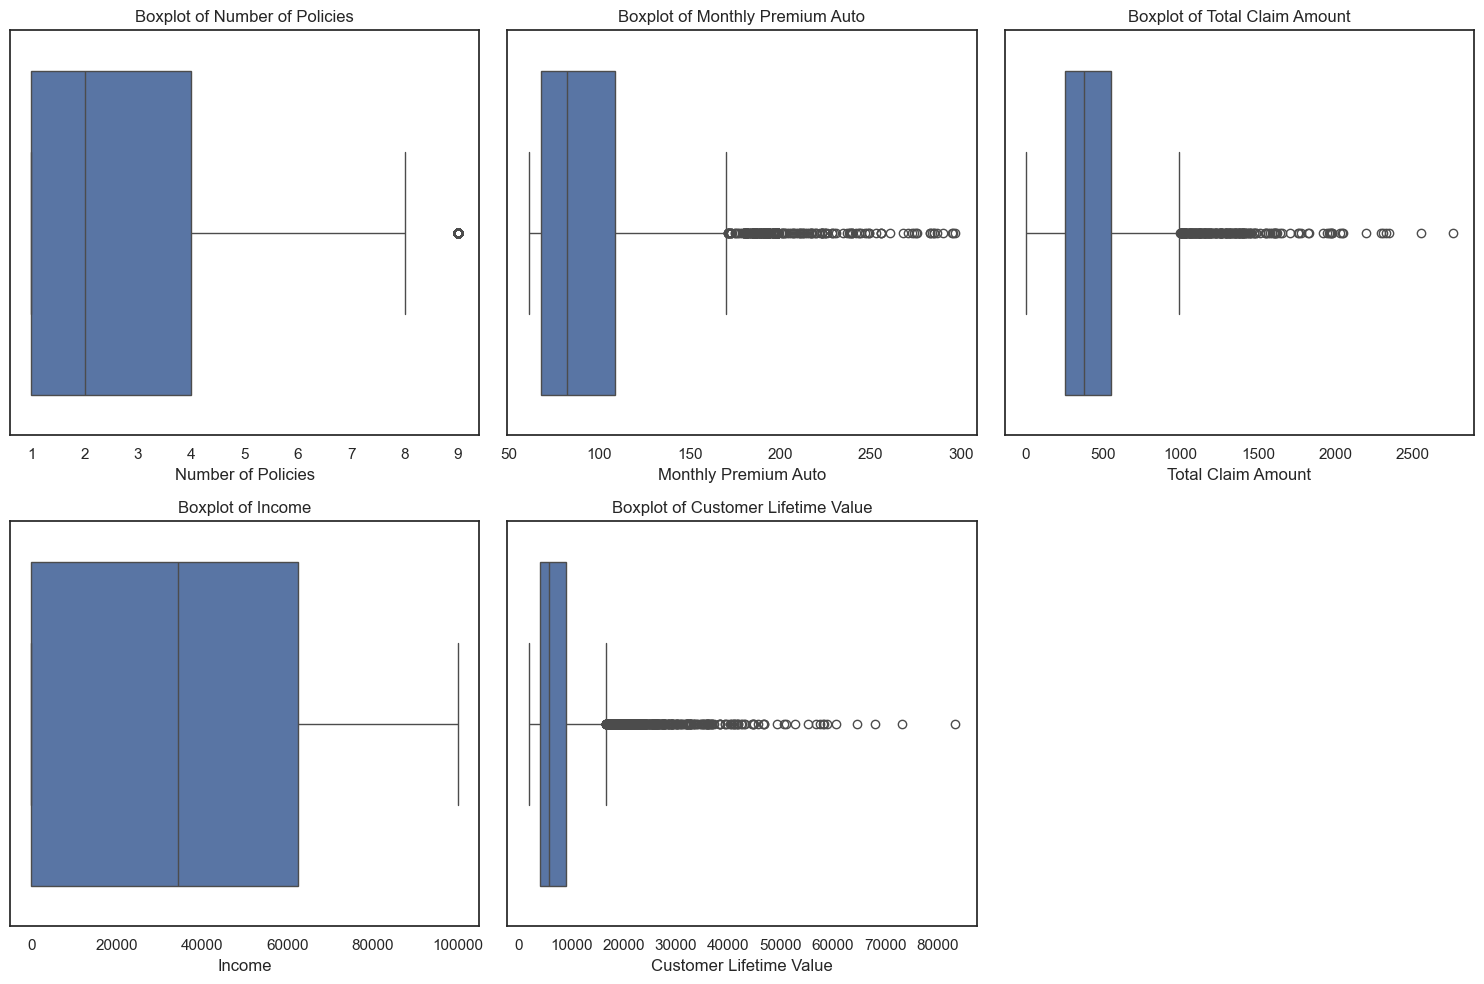

In [207]:
# Select integer-type columns
test_boxplot = df_numerik

# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = -(-len(test_boxplot.columns) // num_cols)  # Ceiling division to ensure enough rows for all columns

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize based on the number of rows

# Iterate over each column and plot boxplot
for idx, column in enumerate(test_boxplot.columns):
    row = idx // num_cols
    col = idx % num_cols
    sns.boxplot(x=test_boxplot[column], ax=axs[row, col])
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_xlabel(column)

# Remove any unused subplots
for idx in range(len(test_boxplot.columns), num_rows*num_cols):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

Take a look at this boxplot. We can see that the Monthly Premium Auto has very tight outliers, so I won't delete them. The Income feature has no outliers, and although Customer Lifetime Value has outliers, it is the target variable, so I won't take any action that affects the target. The most visible features for which we can delete outliers are Number of Policies and Total Claim Amount.

In [208]:
# Check df['Number of Policies] more then 8
df[df['Number of Policies'] > 8]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
57,Sports Car,Extended,Offer1,Unemployed,Single,Master,9.0,122.0,650.521790,0.0,9031.214859
108,Four-Door Car,Extended,Offer3,Employed,Married,High School or Below,9.0,84.0,114.815893,22244.0,6686.128629
136,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,9.0,61.0,40.562432,61613.0,4825.651946
158,Four-Door Car,Basic,Offer2,Medical Leave,Single,College,9.0,63.0,302.400000,22571.0,4605.036646
159,Four-Door Car,Basic,Offer3,Employed,Married,College,9.0,70.0,336.000000,59782.0,5626.572446
...,...,...,...,...,...,...,...,...,...,...,...
5617,Four-Door Car,Extended,Offer4,Unemployed,Married,College,9.0,83.0,398.400000,0.0,5996.065073
5630,Four-Door Car,Basic,Offer1,Retired,Divorced,High School or Below,9.0,68.0,326.400000,20862.0,4794.481412
5645,Four-Door Car,Extended,Offer3,Retired,Married,Master,9.0,93.0,498.452698,16224.0,7031.463693
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9.0,67.0,132.443705,0.0,4927.707574


In [209]:
# Check data that has Total Claim Amount more than $2.000
df[df['Total Claim Amount']>2000]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
1141,Luxury Car,Extended,Offer1,Unemployed,Single,College,2.0,203.0,2027.724442,0.0,20714.940430
1262,Luxury Car,Extended,Offer1,Employed,Single,High School or Below,3.0,249.0,2294.631639,38688.0,19435.629240
1488,Luxury Car,Basic,Offer3,Unemployed,Single,High School or Below,1.0,191.0,2042.569089,0.0,6758.807188
1746,Luxury SUV,Extended,Offer1,Unemployed,Single,Bachelor,1.0,245.0,2345.413441,0.0,8672.229719
3150,Luxury Car,Basic,Offer1,Unemployed,Single,College,5.0,189.0,2201.327879,0.0,12767.230560
3786,Luxury Car,Premium,Offer4,Unemployed,Single,High School or Below,1.0,261.0,2759.794354,0.0,9295.411150
4656,Luxury SUV,Basic,Offer2,Unemployed,Single,College,1.0,196.0,2327.166394,0.0,6383.611136
4897,Luxury SUV,Extended,Offer1,Employed,Single,High School or Below,2.0,220.0,2552.343856,51504.0,43217.216110
5335,Luxury Car,Premium,Offer2,Employed,Married,College,4.0,285.0,2052.000000,89384.0,22837.139200
5576,Luxury SUV,Basic,Offer4,Unemployed,Single,High School or Below,1.0,194.0,2306.508397,0.0,6601.611299


This group mostly owns `luxury cars`, but most of them are `unemployed`. They usually have only one policy, but their `monthly auto premium is quite high`. Additionally, their CLV is relatively high compared to the overall dataset; the third quartile (Q3) of CLV in the overall dataset is only $9,028, but most members of this group exceed that value. Therefore, I examined and compared their summary statistics.

In [210]:
# Show summary statistics of df['Total Claim Amount'] > 2000
df[df['Total Claim Amount']>2000].describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,10.000000,10.00000,10.000000,10.000000,10.000000
mean,2.100000,223.30000,2290.947949,17957.600000,15668.382603
std,1.449138,34.32864,233.043936,31471.625383,11526.590768
min,1.000000,189.00000,2027.724442,0.000000,6383.611136
25%,1.000000,194.50000,2089.331970,0.000000,7237.162821
50%,1.500000,211.50000,2300.570018,0.000000,11031.320855
75%,2.750000,248.00000,2340.851679,29016.000000,20395.112633
max,5.000000,285.00000,2759.794354,89384.000000,43217.216110


In [211]:
# Show summary statistics of df original
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


As we can see from comparing the summary statistics, customers with a total claim value exceeding $2,000 may have fewer policies, but their monthly auto premium is higher than the overall dataset. Additionally, their customer lifetime value (CLV) significantly exceeds that of the original dataset.

### **10.a Delete Outliers**

In [212]:
# Create new df that exclude the outliers
df_del_outlier = df[~(
    (df['Number of Policies'] > 8) |
    (df['Total Claim Amount'] > 2000)
)]


In [213]:
df.shape

(5051, 11)

In [214]:
df_del_outlier.shape

(4813, 11)

There are 238 data points considered as outliers, which constitute 4.7% of the dataset.

### **10.b Define X and y**

In [215]:
X_del_outlier = df_del_outlier.drop(columns='Customer Lifetime Value')
y_del_outlier = df_del_outlier['Customer Lifetime Value']

### **10.c Data Preprocessing**

In [216]:
# Splitting data training and test with proportion 70 : 30
X_del_train, X_del_test, y_del_train, y_del_test= train_test_split(
    X_del_outlier,
    y_del_outlier,  
    test_size=0.3,
    random_state=1)

In [217]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('oneHot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'Renew Offer Type',
                                  'EmploymentStatus', 'Marital Status']),
                                ('ordinal_encoding',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Extended    2
Basic       1
Premium     3
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                 ['Coverage', 'Education']),
                                ('robustscale', RobustScaler(),
                                 ['Monthly Premium Auto', 'Number of Policies',
                                  'Total Claim Amount', 'Income'])])

### **10.d Predicting to test Set**

In [218]:
# Define model
rf = RandomForestRegressor(random_state=1)

# Transform the model into a logarithmic scale, and then invert it for interpretation
log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)

# Prepare the pipeline (Assume 'transformer' is defined elsewhere)
model = Pipeline([
    ('preprocessing', transformer),
    ('model', log_rf)
])

# Fit the model
model.fit(X_del_train, y_del_train)

# Predict on the test set
y_pred_del_outlier = model.predict(X_del_test)

# Calculate RMSE, MAE, MAPE scores
rmse_rf = np.sqrt(mean_squared_error(y_del_test, y_pred_del_outlier))
mae_rf = mean_absolute_error(y_del_test, y_pred_del_outlier)
mape_rf = mean_absolute_percentage_error(y_del_test, y_pred_del_outlier)

# Create a DataFrame to store the scores
score_after_del_outlier = pd.DataFrame({'RMSE': [rmse_rf], 'MAE': [mae_rf], 'MAPE': [mape_rf]}, index=['RF_del_outlier'])

# Display the scores
score_after_del_outlier


,RMSE,MAE,MAPE
RF_del_outlier,3840.605553,1488.558314,0.10234


In [219]:
score_after_rf_final

,RMSE,MAE,MAPE
RF_final_result,4112.975827,1589.40795,0.108976


After deleting the outliers, the scores for RMSE, MAE, and MAPE improved. Therefore, we will use the dataset with the outliers removed for further analysis.



### **10.e Residual Plot**

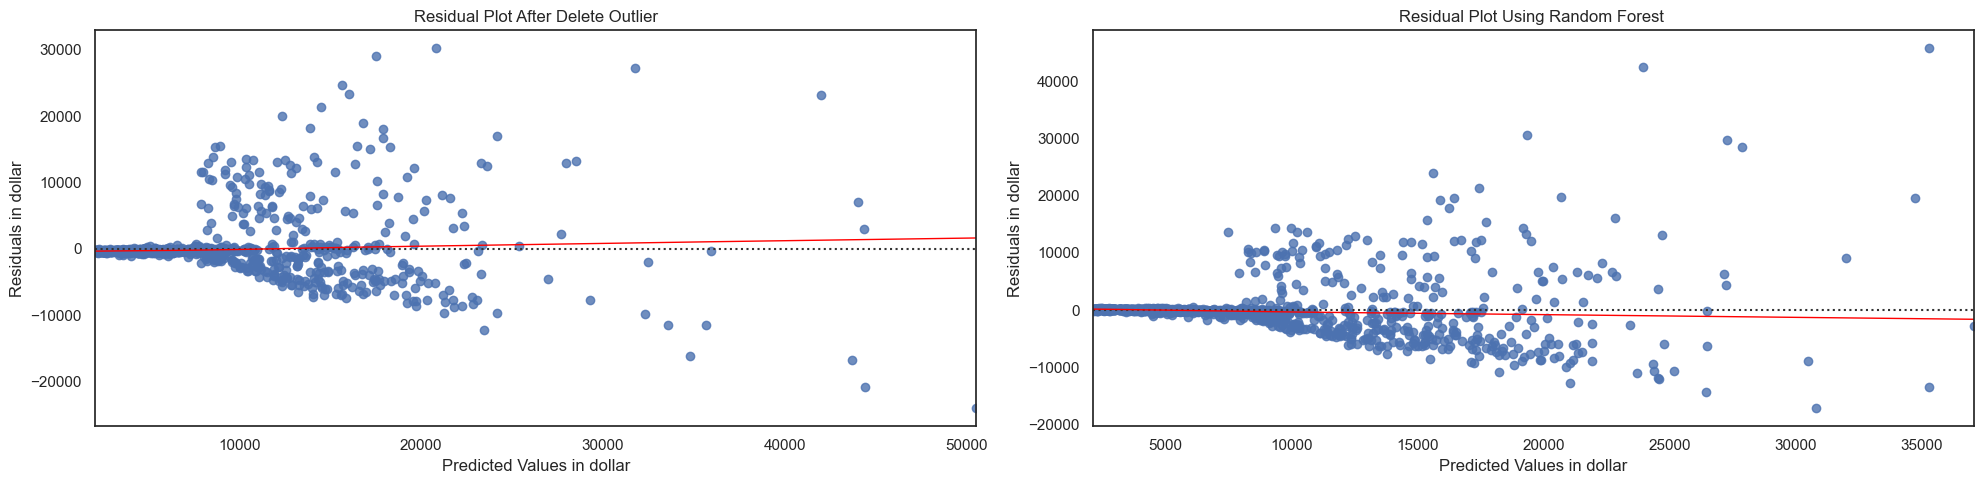

In [220]:
plt.figure(figsize=(20,5))

# Calculate residuals
residual_outlier = y_del_test - y_pred_del_outlier

# Create a residual plot
plt.subplot(1,2,1)
sns.residplot(x=y_pred_del_outlier, y=residual_outlier, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values in dollar')
plt.ylabel('Residuals in dollar')
plt.title('Residual Plot After Delete Outlier')

plt.subplot(1,2,2)
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values in dollar')
plt.ylabel('Residuals in dollar')
plt.title('Residual Plot Using Random Forest ')

# Display the plots
plt.tight_layout()
plt.show()

Above are the comparisons of the residual plots for the dataset with outliers removed and the dataset in its original form. Here is the comparison:

|  | **Residual Plot Delete Outlier** | **Residual Plot Data Original** |
| --- | --- | --- |
| y_pred Values | >$50.000 | >$35.000 |
| Range of Residual Value | $ (25.000) - 30.000 | $ (18.000) - 45.000 |

One noticeable observation is how the `y_pred values of the dataset with outliers removed can predict higher values than the original dataset`.

In my assumption, using the original dataset, we don’t segment the group based on their total claim. However, as we explored in the dataset, customers with a total claim exceeding $2,000 may have fewer policies but their monthly payments are quite high. Meanwhile other customers may have lower policies and lower monthly payments, this can affect the calculation of CLV, as the high-claim data blends with the other data.

And then, after deleting the outliers, the data is slightly more centralized. This can enable the model to predict higher values for customers who may have higher transactions.

From this article, it also explains that deleting outliers can increase the coefficient correlation, which in turn enables the model to predict higher values. https://study.com/skill/learn/identifying-the-effects-of-removing-outliers-on-regression-lines-explanation.html

Additionally, for the `range of residual values, we can see that the dataset with outliers removed has a narrower range than the original dataset.`


<hr>

## **11. Explainable ML using Feature Importance & Shap Values**

In [221]:
import shap 

In [222]:
# Extract the RandomForestRegressor from the pipeline
rf_model = model.named_steps['model'].regressor_

# Access feature importances
feature_importances = rf_model.feature_importances_

feature_importances

array([1.16110930e-04, 7.54751603e-05, 6.58568021e-04, 6.31378541e-04,
       2.24659354e-03, 3.54009616e-03, 2.83084832e-03, 2.59325593e-03,
       1.93352865e-03, 2.03405125e-03, 2.73898227e-04, 1.44825745e-03,
       2.74906676e-03, 3.25023803e-03, 4.39356834e-03, 9.57858934e-03,
       2.24742122e-01, 6.86730807e-01, 2.71951801e-02, 2.29783658e-02])

In [223]:
# Create dataframe to show feature and the value of each coefficient
df_koefisien = pd.DataFrame(data = feature_importances,
             index=all_cols )

df_koefisien.reset_index(inplace=True)
df_koefisien.columns = ['feature','importance']
df_koefisien = df_koefisien.sort_values(by='importance',ascending=False)
df_koefisien

,feature,importance
17,Number of Policies,0.686731
16,Monthly Premium Auto,0.224742
18,Total Claim Amount,0.027195
19,Income,0.022978
15,Education,0.009579
14,Coverage,0.004394
5,Renew Offer Type_Offer2,0.003540
13,Marital Status_Single,0.003250
6,Renew Offer Type_Offer3,0.002831
12,Marital Status_Married,0.002749


From the table above, we analyze the top 5 most important features:

1. **Number of Policies**  
    This feature has the highest coefficient for CLV. This makes sense because CLV is the calculation of a customer's transactions over their lifespan. Therefore, a higher number of policies can significantly impact the CLV.

2. **Monthly Premium Auto**  
    This also makes sense because the higher the premium a customer pays, the higher the CLV value will be.

3. **Total Claim Amount**  
    Total claim amount is in the top 3. Although I am still confused about why it can increase CLV, since this feature is considered a cost, the correlation table shows that monthly premium auto is correlated with the total claim amount. It is possible that because these two features are correlated, they jointly impact the CLV.

4. **Income**  
    This feature makes sense because higher income increases the capability of a customer to buy insurance policies. Additionally, 63% of our data are employed, which is why it has an impact.

5. **Education**  
    All customers in this dataset have at least a high school education.


For the next experiment, I will try running the Random Forest model with only three features: Number of Policies, Monthly Premium Auto, and Total Claim Amount. This is because, according to the equation above, CLV is the calculation of a customer's transactions over their lifespan.


In [224]:
list(df_koefisien['feature'])

['Number of Policies',
 'Monthly Premium Auto',
 'Total Claim Amount',
 'Income',
 'Education',
 'Coverage',
 'Renew Offer Type_Offer2',
 'Marital Status_Single',
 'Renew Offer Type_Offer3',
 'Marital Status_Married',
 'Renew Offer Type_Offer4',
 'Vehicle Class_Two-Door Car',
 'EmploymentStatus_Medical Leave',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Unemployed',
 'Vehicle Class_SUV',
 'Vehicle Class_Sports Car',
 'EmploymentStatus_Retired',
 'Vehicle Class_Luxury Car',
 'Vehicle Class_Luxury SUV']

In [225]:
# fit the transformer to X_train
transformer.fit(X_del_train)

# transform
X_train_prep = transformer.transform(X_del_train)
X_test_prep = transformer.transform(X_del_test)

# Change to dataframe 
X_train_prep_df1 = pd.DataFrame(X_train_prep)
X_test_prep_df1 = pd.DataFrame(X_test_prep)

# Change the name of columns
X_test_prep_df1.columns = all_cols
X_train_prep_df1.columns = all_cols

100%|===================| 3360/3369 [02:53<00:00]        

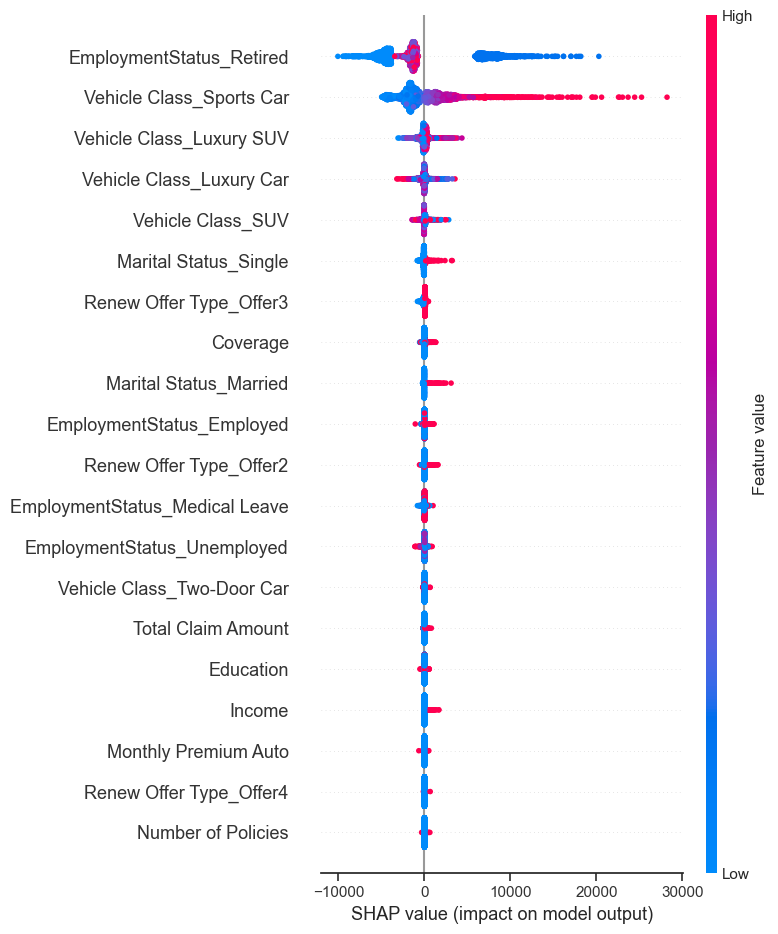

In [226]:
# Define model
rf = RandomForestRegressor(random_state=1)

rf.fit (X_train_prep_df1,y_del_train)


# define explainer
explainer = shap.TreeExplainer(
    rf,
    data = X_train_prep_df1,
    # feature_dependence="independent",
    # model_output="probability"    
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer.shap_values(X_train_prep_df1,check_additivity=False)

# tampilkan dalam bentuk plot                                #  
shap.summary_plot(shap_values, X_train_prep_df1, feature_names = list(df_koefisien['feature']))


Using SHAP values, two features that stand out are `EmploymentStatus_Retired` and `VehicleClass_SportsCar`. This suddenly provides the missing pieces. As we know, the top 5 important features are Number of Policies, Monthly Premium, Total Claim Amount, Income, and Education. When combined with the SHAP values mentioned above, the impact of owning a sports car on CLV becomes evident.

If you remember, in the scatterplot in the EDA section, customers with only two policies showed a wide variance in CLV, up to $80,000. Knowing this, customers who own sports cars may have fewer policies, but their higher monthly premiums can affect the CLV and make it more varied. By comparing summary statistics, we can see that the monthly premiums and their total claim amount for those owning sports cars are higher at each quartile (Q1, Q2, Q3) than for customers who do not own sports cars.

Another insight is that most contributors are customers who are still actively working. This highlights the importance for the marketing department to explore more about this type of customer for better ad targeting.

In [227]:
# Show statistic summary of customers that have sports car 
df[df['Vehicle Class'] == 'Sports Car'].describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,262.000000,262.000000,262.000000,262.000000,262.000000
mean,2.896947,122.190840,550.563401,35855.301527,11543.506772
std,2.237111,19.335559,299.232668,29878.137239,9219.335755
min,1.000000,100.000000,5.573179,0.000000,3074.105486
25%,1.000000,109.000000,343.433805,0.000000,5280.228129
50%,2.000000,116.000000,556.800000,29712.000000,8774.738289
75%,4.000000,132.000000,706.592595,58144.250000,12597.759180
max,9.000000,199.000000,1516.383753,99874.000000,67907.270500


In [228]:
# Show statistic summary of customers that haven't sports car
df[df['Vehicle Class'] != 'Sports Car'].describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,2.997285,91.309250,423.192087,37842.939027,7868.876750
std,2.394515,34.257029,291.382615,30735.034416,6796.173952
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,249.803437,0.000000,3819.619502
50%,2.000000,79.000000,366.531664,34612.000000,5741.696078
75%,4.000000,106.000000,537.600000,62634.000000,8742.472473
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [229]:
# Show customer that has the highest value CLV
df[df['Customer Lifetime Value']>80000]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
1091,Luxury Car,Extended,Offer1,Employed,Married,High School or Below,2.0,231.0,1108.8,58958.0,83325.38119


By comparing the statistical summary, we can see that customers who have sports cars have a higher range of monthly auto premiums and total claim amounts. The median CLV is also higher compared to customers who do not have sports cars

<hr>

# **Conclusion**

After conducting 4 experiments, the best model identified is the `Random Forest without any hyperparameter tuning` and then it needed to `delete outlier` where we delete the customer that has more than 8 policy and has been claim more than $2.000 

This model performs well in evaluating Customer Lifetime Value (CLV) within the range up to $10,000, which corresponds to the third quartile (Q3) of the CLV distribution. Therefore, this data effectively represents:

- Customers with 1 to 4 insurance policies.
- Customers with a monthly auto premium of $61 to $109.
- Customers with a total claim amount up to $550.
- Customers with an income range of $0 to $62,500.

The model achieved a Mean Absolute Percentage Error (MAPE) of 10.23%, indicating that the model's predictions could deviate by up to 10.23% from the actual values, particularly for customers within the specified ranges. However, the model might exhibit higher error rates due to potential bias.

Analyzing feature importance from the model reveals that the most significant features are the `number of policies`, `monthly auto premium`, `total claim amount` , `income and education`. This makes sense because CLV calculations are primarily based on the number of transactions made by customers

Combining this with the SHAP values, the `vehicle class`, especially for those who own `sports cars`, can make clv more varied. 

### **Impact on Business & Recommendation**

The presence of machine learning can help a company effectively strategize for different types of customers, especially regarding strategies to retain old customers or attract new ones. As mentioned at the very beginning, the strategy, cost, and profitability of retaining versus attracting customers differ significantly.

Using machine learning, we can delve deeper into how various factors influence our customers. It also enables the company to ask more in-depth questions to improve their performance. For instance, in renewal offers, there are four options, but the most popular are renew1 and renew2. By predicting Customer Lifetime Value (CLV) and combining it with other machine learning techniques like clustering, we can analyze the decision factors of customers more effectively. This enables the company to revise or add additional value to boost performance.

For further projects, combine with unsupervised learning to do clustering for better insights about customer demographics and to develop better strategies. For example, you can develop a customer loyalty program with different tiers to increase customer pride. Additionally, for customers with low CLV, various strategies such as giving promotions or creating bundles could be implemented to increase their interest.

Develop a strategy to attract customers who own sports cars and luxury cars by creating a gathering event with various exclusive car sellers to introduce their products.

There are vast opportunities for companies that embrace technology to increase their performance more effectively and efficiently. 



<hr>

# **Recommendation** 

`Conduct A/B testing on the latest data, particularly for those that fall within the specified ranges, as data outside these ranges may result in significant errors.`

Additionally, there are several steps to improve this model:



1. **Include Customer Timeframe Data**:
   - Since CLV calculates customer transactions over a certain period, it's essential to add data on the customer’s duration, especially for long-term customers.

2. **Incorporate Correlated Features**:
   - Add features that are likely correlated with CLV. Based on the calculation of CLV, consider including:
     - Total revenue over a set timeframe.
     - Total number of purchases.
     - Average customer lifespan.
     - Some categorical features, like age and gender, can help the marketing department create targeted marketing strategies in the future

3. **Increase Data Quantity and Variety**:
   - Collect more diverse and extensive data, particularly features that show a strong correlation with CLV. This will enhance the model’s performance and ensure a better distribution of data.

4. **Expand Model Usage**:
   - Utilize the model for additional purposes such as clustering to understand different customer segments. 
   - Develop a user and item matrix for personalized recommendations.
   - Implement various strategies to enhance customer lifetime value based on insights from the model.

5. **Another Testing for Feature Selection**<br>
   For this experiment, I only used the three features related to the CLV equation mentioned at the very beginning. However, it is suggested to test again with additional features, especially if the company decides to add other features to increase the model's performance. 

By following these steps, you can refine the regression model, making it more accurate and useful for predicting CLV and other related applications.







In [230]:
# import pickle
# import gzip

# # Define model
# rf = RandomForestRegressor(random_state=1)

# # Transform the model into a logarithmic scale, and then invert it 
# log_rf = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)

# estimator = Pipeline([('preprocess', transformer), ('model', log_rf)])
# estimator.fit(X_del_train, y_del_train)

# # Save the model with gzip compression
# with gzip.open('Model_CLV_rforest01.sav.gz', 'wb') as f:
#     pickle.dump(estimator, f)

In [232]:
# # Load the model from the gzip file
# with gzip.open('Model_CLV_rforest01.sav.gz', 'rb') as f:
#     loaded_model = pickle.load(f)

# # Predict using the loaded model
# y_pred = loaded_model.predict(X_del_test)

# # Calculate Mean Absolute Percentage Error (MAPE)
# mape = mean_absolute_percentage_error(y_del_test, y_pred)

# print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Percentage Error (MAPE): 0.1023399719542362


## **Resources**

https://study.com/skill/learn/identifying-the-effects-of-removing-outliers-on-regression-lines-explanation.html <br>
https://www.pwc.com/cz/en/risk-management-and-modelling/CLV_Final.pdf <br>
https://blog.hubspot.com/service/how-to-calculate-customer-lifetime-value#:~:text=Customer%20lifetime%20value%20(CLV%20or%20CLTV)%20is%20a%20metric%20that,the%20company's%20predicted%20customer%20lifespan. <br>
https://delighted.com/blog/customer-lifetime-value-formula <br>
https://www.peelinsights.com/post/what-is-customer-lifetime-value-clv#:~:text=What%20Is%20Customer%20Lifetime%20Value%20(CLV)%3F,a%20given%20set%20of%20customers. <br>
